In [6]:
### for MacOS or Linux ###
# check whats in the root folder
from subprocess import check_output
print(check_output(['ls', './']).decode('utf8'))

# Imports

In [1]:
import sys
### for Mac
# sys.path.insert(0, '/Users/xiaopupeng/dropbox/workspace/cqsim-redux/')
### for PC
sys.path.insert(0, 'C:/Users/xzp0007/Dropbox/Workspace/CQSim-REDUX/')
import os
import copy
from datetime import datetime
import time
import re
import random
import numpy as np
import pandas as pd
# %matplotlib inline
%matplotlib notebook
# %matplotlib widget
import matplotlib.pyplot as plt
import itertools
# import Redux as rd
plt.style.use('ggplot')
# plt.style.use('default')

In [2]:
### For Mac
# path_main='/Users/xiaopupeng/dropbox/workspace/cqsim-redux/'
### for PC
path_main='C:/Users/xzp0007/Dropbox/Workspace/CQSim-REDUX/'
path_data=path_main+'data/'
redux_src=path_main+'srcREDUX/'
cqsim_src=path_main+'srcCQSim/'
sys.path.append(path_main)

In [3]:
### CQSim modules ###
# preprocess
import srcCQSim.Filter.Filter_job_SWF as FilterJob
import srcCQSim.CqSim.Job_trace as JobTrace
import srcCQSim.Filter.Filter_node_SWF as FilterNode
import srcCQSim.CqSim.Node_struc as NodeStruc
# algorithms
import srcCQSim.CqSim.Start_window as StartWindow
# record the results
import srcCQSim.CqSim.Info_collect as InfoCollect
# import srcCQSim.Output_log as OutputLog

# new module of renewable energy aware
import srcCQSim.CqSim.power as Power
# simulator
import srcCQSim.ReCqsim_sim as CqsimSim

### REDUX modules ###
import srcREDUX.REDUX.DataIO as dataIO
import srcREDUX.REDUX.Update as update
import srcREDUX.REDUX.Predict_Smooth as predict_smooth
import srcREDUX.REDUX.Results as results
import srcREDUX.ReduxSim as ReduxSim

In [4]:
#ReCq module
import ReCqSim
#main method
import cqsim_redux as cr

# Initialize

In [5]:
# assign default value to all parameters
def initCQ():
    inputCQ = {
    ### job trace name and save file names ###
    # 'job_trace': 'test2.swf',
    # 'job_save': 'jobSave_test2',
#     'job_trace': 'SDSC-SP2-1998-4.2-cln.swf',
    'job_trace': 'SDSC-SP2-1998-4.2-cln.swf',
    'job_save': 'jobSave_SDSC-SP2-1998-4.2-cln',
    ### system config ###
    'cluster_fraction': 1.0,
    'start': 0.0,
    'start_date': 'None',
    'anchor': 0,
    'read_num': 20000,
    ### algorithm config ###
    # w:job wait time s: submit time t: requested time n: requested processors q:priority queue
    'win': 1, # =1 for window_check mode, other for no check
    'win_para': ['5', '0', '0'],
    #start window module parameter: [window size],[check size],[max start size],[max window size]
    ### config of names ###
    'config': 'config.set',
    'pre_name': "CQSIM_",
    'path_in': path_data+'InputCQSim/',
    'path_fmt': path_data+'Fmt/',
    #### 0:Read original file  1:Read formatted file ###
    'resource_job': 0,
    'resource_node': 0
    }
    return inputCQ

def initRE():
    inputRE = {
    # ### CONSTANT ###
    # ratio of stats count when start the arithmetic average estimate
    'scaleRatio': 0.01,
    # ability of ups devise, could be more sophisticated in future (kWh)
    'upsCapability': 500,
    # the workload processing capability of data center (in processors)
    # 'dataCenterCap': 2500,
    'nodNum': 1152,
    'procPerNode': 8,
    # ups and renewable energy price ($)
    'upsPrice': 0.02,
    'solarPrice': 0.09,
    'windPrice': 0.15,
    # ### INITIALIZE ###
    # the initialized threshold of grid price ($)
    'initGridpriceThreshold': 1.0,
    # initialized high and low ratio of current workload for workload shaving
    'initCurWorkloadRatio': 0.2,
    # initialized stable renewable supply level
    'initStableRenSupply': 500,
    ### config of names ###
    'path_in': path_data+'InputREDUX/',
    'path_out': path_data+'REDUXResults/',
    }
    return inputRE

inputCQ=initCQ()
inputRE=initRE()

In [6]:
cr.showInputAndSetName(inputCQ, inputRE)
trace_name = inputCQ['path_in'] + inputCQ['job_trace']
save_name_j = inputCQ['path_fmt'] + inputCQ['job_save'] + '.csv'
config_name_j = inputCQ['path_fmt'] + inputCQ['job_save'] + '.txt'

....................
job_trace: SDSC-SP2-1998-4.2-cln.swf
job_save: jobSave_SDSC-SP2-1998-4.2-cln
cluster_fraction: 1.0
start: 0.0
start_date: None
anchor: 0
read_num: 20000
win: 1
win_para: ['5', '0', '0']
config: config.set
pre_name: CQSIM_
path_in: C:/Users/xzp0007/Dropbox/Workspace/CQSim-REDUX/data/InputCQSim/
path_fmt: C:/Users/xzp0007/Dropbox/Workspace/CQSim-REDUX/data/Fmt/
resource_job: 0
resource_node: 0
....................
scaleRatio: 0.01
upsCapability: 500
nodNum: 1152
procPerNode: 8
upsPrice: 0.02
solarPrice: 0.09
windPrice: 0.15
initGridpriceThreshold: 1.0
initCurWorkloadRatio: 0.2
initStableRenSupply: 500
path_in: C:/Users/xzp0007/Dropbox/Workspace/CQSim-REDUX/data/InputREDUX/
path_out: C:/Users/xzp0007/Dropbox/Workspace/CQSim-REDUX/data/REDUXResults/
....................


In [8]:
%whos

Variable         Type        Data/Info
--------------------------------------
CqsimSim         module      <module 'srcCQSim.ReCqsim<...>rcCQSim\\ReCqsim_sim.py'>
FilterJob        module      <module 'srcCQSim.Filter.<...>lter\\Filter_job_SWF.py'>
FilterNode       module      <module 'srcCQSim.Filter.<...>ter\\Filter_node_SWF.py'>
InfoCollect      module      <module 'srcCQSim.CqSim.I<...>\CqSim\\Info_collect.py'>
JobTrace         module      <module 'srcCQSim.CqSim.J<...>im\\CqSim\\Job_trace.py'>
NodeStruc        module      <module 'srcCQSim.CqSim.N<...>m\\CqSim\\Node_struc.py'>
Power            module      <module 'srcCQSim.CqSim.p<...>cCQSim\\CqSim\\power.py'>
ReCqSim          module      <module 'ReCqSim' from 'C<...>CQSim-REDUX\\ReCqSim.py'>
ReduxSim         module      <module 'srcREDUX.ReduxSi<...>\\srcREDUX\\ReduxSim.py'>
StartWindow      module      <module 'srcCQSim.CqSim.S<...>\CqSim\\Start_window.py'>
check_output     function    <function check_output at 0x0000017BC69CF9D

# Module Stucture & Init 

In [7]:
### CQSim modules ###
print( ".................... Job Filter" )
module_filter_job = FilterJob.Filter_job_SWF(trace=trace_name, save=save_name_j, config=config_name_j)
module_filter_job.read_job_trace()
module_filter_job.output_job_data()
module_filter_job.output_job_config()

print( ".................... Job Trace" )
module_job_trace = JobTrace.Job_trace(start=inputCQ['start'],num=inputCQ['read_num'],anchor=inputCQ['anchor'],density=inputCQ['cluster_fraction'])
module_job_trace.import_job_file(save_name_j)
module_job_trace.import_job_config(config_name_j)

print("................ Power Profile")
module_pow = Power.Power(job_module=module_job_trace)
# power profile input: 1.processors 2.runtime
# power supply input:

print( ".................... Start Window" )
module_win = StartWindow.Start_window(mode=inputCQ['win'],power_module=module_pow,para_list=inputCQ['win_para'])

print( ".................... Information Collect" )
module_info_collect = InfoCollect.Info_collect()

# # Output Log
# print( ".................... Output Log" )
# module_output_log = OutputLog.Output_log (output=output_fn)

### REDUX modules ###
print(".................... Data Input")
input_module = dataIO.DataIO(inputPara = inputRE)
input_module.loadData()
inputRE['dataSize'] = input_module.data_size
print('data size:', inputRE['dataSize'])

print(".................... Update")
update_module = update.Update(inputPara=inputRE)

print(".................... Predict&Smooth")
predict_smooth_module = predict_smooth.Predict_Smooth(inputRE, update_module)

print(".................... Smooth")
results_module = results.Results()

# print(".................... Print Output")
# output_module = dataIO.DataIO(inputRE)

# Cqsim Simulator
print( ".................... Cqsim Simulator" )
module_list_cq = {
'job':module_job_trace,
'win':module_win,
'pow':module_pow,
'info':module_info_collect
# 'output':module_output_log
}
module_CQsim = CqsimSim.Cqsim_sim(module_list=module_list_cq)
module_list_cq['CQsim']=module_CQsim

# REDUX Simulator
print(".................... Redux Simulator")
module_list_re = {
'input':input_module,
'update': update_module,
'predsmoo': predict_smooth_module,
'results': results_module
# 'output':output_module
}
module_REsim = ReduxSim.Redux_Sim(module_list=module_list_re)
module_list_re['REsim']=module_REsim


.................... Job Filter
.................... Job Trace
{'date': 'Fri Apr 24 18:11:04 PDT 1998', 'start_offset': '0.0'}
................ Power Profile
.................... Start Window
.................... Information Collect
.................... Data Input
data size: 2568
.................... Update
.................... Predict&Smooth
.................... Smooth
.................... Cqsim Simulator
Job Trace ................... Load
Start Window ................... Load
Power ................... Load
Info Collect ................... Load
.................... Redux Simulator
DataIO ................... Load
Update ................... Load
Predict_Smooth ................... Load
Results ................... Load


In [10]:
%whos

Variable                Type              Data/Info
---------------------------------------------------
CqsimSim                module            <module 'srcCQSim.ReCqsim<...>rcCQSim\\ReCqsim_sim.py'>
FilterJob               module            <module 'srcCQSim.Filter.<...>lter\\Filter_job_SWF.py'>
FilterNode              module            <module 'srcCQSim.Filter.<...>ter\\Filter_node_SWF.py'>
InfoCollect             module            <module 'srcCQSim.CqSim.I<...>\CqSim\\Info_collect.py'>
JobTrace                module            <module 'srcCQSim.CqSim.J<...>im\\CqSim\\Job_trace.py'>
NodeStruc               module            <module 'srcCQSim.CqSim.N<...>m\\CqSim\\Node_struc.py'>
Power                   module            <module 'srcCQSim.CqSim.p<...>cCQSim\\CqSim\\power.py'>
ReCqSim                 module            <module 'ReCqSim' from 'C<...>CQSim-REDUX\\ReCqSim.py'>
ReduxSim                module            <module 'srcREDUX.ReduxSi<...>\\srcREDUX\\ReduxSim.py'>
StartWindow   

# StartSim 

## ren-aware 

In [8]:
# Init Integraded Simulator
module_sim = ReCqSim.ReCqSim(module_list_cq=module_list_cq, module_list_re=module_list_re)

>>>>>>>>>>>>>> ReCqSim modules list:
Job Trace ................... Load
Start Window ................... Load
Power ................... Load
Info Collect ................... Load
Cqsim Sim ................... Load
DataIO ................... Load
Update ................... Load
Predict_Smooth ................... Load
Results ................... Load
ReduxSim ................... Load


In [18]:
%whos

Variable                Type              Data/Info
---------------------------------------------------
CqsimSim                module            <module 'srcCQSim.ReCqsim<...>rcCQSim\\ReCqsim_sim.py'>
FilterJob               module            <module 'srcCQSim.Filter.<...>lter\\Filter_job_SWF.py'>
FilterNode              module            <module 'srcCQSim.Filter.<...>ter\\Filter_node_SWF.py'>
InfoCollect             module            <module 'srcCQSim.CqSim.I<...>\CqSim\\Info_collect.py'>
JobTrace                module            <module 'srcCQSim.CqSim.J<...>im\\CqSim\\Job_trace.py'>
NodeStruc               module            <module 'srcCQSim.CqSim.N<...>m\\CqSim\\Node_struc.py'>
Power                   module            <module 'srcCQSim.CqSim.p<...>cCQSim\\CqSim\\power.py'>
ReCqSim                 module            <module 'ReCqSim' from 'C<...>CQSim-REDUX\\ReCqSim.py'>
ReduxSim                module            <module 'srcREDUX.ReduxSi<...>\\srcREDUX\\ReduxSim.py'>
StartWindow   

In [9]:
print('======================','ren-aware Sim','======================')
curHour = 0
dataSize = module_sim.REmod['input'].get_data_size()
print('data size >>>>>>>>>>>>>>>>>>>>', dataSize)
dataCenterCap = module_sim.REmod['update'].data_center_cap() // 40
print('data center Capabiliy >>>>>>>>>>>>>>>>>>>>', dataCenterCap)
dataCenterCapScaleRatio = 0.5
highDataCenterCap = round(dataCenterCap * (1+dataCenterCapScaleRatio))
lowDataCenterCap = round(dataCenterCap * (1-dataCenterCapScaleRatio))
module_sim.CQmod['CQsim'].fill_jobList()
while curHour < dataSize:# Init Integraded Simulator
    print('>>>>>>>>>>>>>>>>> current time (in hours):', curHour)
    renState = module_sim.get_renState(curHour)
    if renState == 'available':
        dataCenterCap = highDataCenterCap
    elif renState == 'outage':
        dataCenterCap = lowDataCenterCap
    else:
        print('Error: no renState')
        break
    workload, module_sim.workloadList = module_sim.CQmod['CQsim'].renaware_workload(module_sim.curTime, renState, dataCenterCap)
    module_sim.curTime += module_sim.timeInterval
    module_sim.REmod['REsim'].redux_sim(curHour, workload, renState)
    curHour += 1

====================== ren-aware Sim ======================
data size >>>>>>>>>>>>>>>>>>>> 2568
data center Capabiliy >>>>>>>>>>>>>>>>>>>> 230
job_num = >>>>>>>>>>>>>> 20000
>>>>>>>>>>>>>>>>> current time (in hours): 0
curTime>>>>>>>>>>>>>>> 3600.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  335
notFilledProc after backfill =  325
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 6226.56
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 6226.56
workload =  6226.56 workloadBuffer= 0 renSupply= 209.0
stableRenSupply= 209.0
upsSupply= 0 upsStorage= 500
gridSupply= 5517.56
reduxCost= 3133.835172 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1
curTime>>>>>>>>>>>>>>> 7200.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  313
notFilledProc after backfill =  271
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 6916.88
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 6916.88
workload =  6916.88 workloadBuffer= 0 renSupply= 241.0
stabl

curTime>>>>>>>>>>>>>>> 158400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  345
notFilledProc after backfill =  205
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 19433.92
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 19433.92
workload =  19433.92 workloadBuffer= 0 renSupply= 164.0
stableRenSupply= 309.033
upsSupply= 500 upsStorage= 0
gridSupply= 18269.92
reduxCost= 14723.709008 
 

>>>>>>>>>>>>>>>>> current time (in hours): 44
curTime>>>>>>>>>>>>>>> 162000.0
dataCenterCap>>>>>>>>>>>>>> 115
notFilledProc =  179
notFilledProc after defer =  297
>>>>>>>>>>>>>>>>>>>>>renState= outage
ren-aware workload>>>>>>>>>>>>>>>>>>> 4139.28
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 4139.28
workload =  4139.28 workloadBuffer= 0 renSupply= 80.0
upsSupply= 0 upsStorage= 0
gridSupply= 4059.2799999999997
reduxCost= 2879.88132 
 

>>>>>>>>>>>>>>>>> current time (in hours): 45
curTime>>>>>>>>>>>>>>> 165600.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  469
notF

upsSupply= 0 upsStorage= 500
gridSupply= 24415.2
reduxCost= 13497.234342857142 
 

>>>>>>>>>>>>>>>>> current time (in hours): 84
curTime>>>>>>>>>>>>>>> 306000.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  345
notFilledProc after backfill =  74
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 24914.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 24914.0
workload =  24914.0 workloadBuffer= 0 renSupply= 177.0
upsSupply= 0 upsStorage= 500
gridSupply= 24737.0
reduxCost= 13668.0455 
 

>>>>>>>>>>>>>>>>> current time (in hours): 85
curTime>>>>>>>>>>>>>>> 309600.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  378
notFilledProc after backfill =  140
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 21988.48
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 21988.48
workload =  21988.48 workloadBuffer= 0 renSupply= 185.0
upsSupply= 0 upsStorage= 500
gridSupply= 21803.48
reduxCost= 12349.036896 
 

>>>>>>>>>>>>>>>>> current time (in

reduxCost= 22119.94770190597 
 

>>>>>>>>>>>>>>>>> current time (in hours): 128
curTime>>>>>>>>>>>>>>> 464400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  278
notFilledProc after backfill =  64
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 48170.4
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 48170.4
workload =  48170.4 workloadBuffer= 0 renSupply= 727.0
upsSupply= 0 upsStorage= 500
gridSupply= 47443.4
reduxCost= 29071.77608 
 

>>>>>>>>>>>>>>>>> current time (in hours): 129
curTime>>>>>>>>>>>>>>> 468000.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  382
notFilledProc after backfill =  206
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 33164.64
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 33164.64
workload =  33164.64 workloadBuffer= 0 renSupply= 723.0
upsSupply= 0 upsStorage= 500
gridSupply= 32441.64
reduxCost= 20497.770708 
 

>>>>>>>>>>>>>>>>> current time (in hours): 130
curTime>>>>>>>>>>>>>>> 471600.0
da

>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 54287.12
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 54287.12
workload =  54287.12 workloadBuffer= 0 renSupply= 209.0
stableRenSupply= 288.827
upsSupply= 0 upsStorage= 0
gridSupply= 54078.12
reduxCost= 15039.186726 
 

>>>>>>>>>>>>>>>>> current time (in hours): 173
curTime>>>>>>>>>>>>>>> 626400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  414
notFilledProc after backfill =  230
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 49570.56
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 49570.56
workload =  49570.56 workloadBuffer= 0 renSupply= 229.0
stableRenSupply= 284.391
upsSupply= 0 upsStorage= 0
gridSupply= 49341.56
reduxCost= 15042.492889999998 
 

>>>>>>>>>>>>>>>>> current time (in hours): 174
curTime>>>>>>>>>>>>>>> 630000.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  309
notFilledProc after backfill =  89
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware worklo

workload in redux>>>>>>>>>>>>>>>>> 8213.44
workload =  8213.44 workloadBuffer= 0 renSupply= 237.0
stableRenSupply= 308.452
upsSupply= 0 upsStorage= 500
gridSupply= 7476.4400000000005
reduxCost= 2938.8872520000004 
 

>>>>>>>>>>>>>>>>> current time (in hours): 216
curTime>>>>>>>>>>>>>>> 781200.0
dataCenterCap>>>>>>>>>>>>>> 115
notFilledProc =  112
notFilledProc after defer =  132
>>>>>>>>>>>>>>>>>>>>>renState= outage
ren-aware workload>>>>>>>>>>>>>>>>>>> 3127.68
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 3127.68
workload =  3127.68 workloadBuffer= 0 renSupply= 57.0
upsSupply= 0 upsStorage= 500
gridSupply= 3070.68
reduxCost= 1247.876448 
 

>>>>>>>>>>>>>>>>> current time (in hours): 217
curTime>>>>>>>>>>>>>>> 784800.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  365
notFilledProc after backfill =  335
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 23134.72
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 23134.72
workload =  23134.72 workloadBuffer= 

curTime>>>>>>>>>>>>>>> 932400.0
dataCenterCap>>>>>>>>>>>>>> 115
notFilledProc =  111
notFilledProc after defer =  120
>>>>>>>>>>>>>>>>>>>>>renState= outage
ren-aware workload>>>>>>>>>>>>>>>>>>> 2789.84
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 2789.84
workload =  2789.84 workloadBuffer= 0 renSupply= 74.0
upsSupply= 0 upsStorage= 500
gridSupply= 2715.84
reduxCost= 1440.2665920000002 
 

>>>>>>>>>>>>>>>>> current time (in hours): 259
curTime>>>>>>>>>>>>>>> 936000.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  324
notFilledProc after backfill =  280
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 17124.48
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 17124.48
workload =  17124.48 workloadBuffer= 0 renSupply= 350.0
stableRenSupply= 312.198
upsSupply= 0 upsStorage= 500
gridSupply= 16274.48
reduxCost= 8664.876382857141 
 

>>>>>>>>>>>>>>>>> current time (in hours): 260
curTime>>>>>>>>>>>>>>> 939600.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  34

>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 56046.08
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 56046.08
workload =  56046.08 workloadBuffer= 0 renSupply= 886.0
upsSupply= 0 upsStorage= 0
gridSupply= 55160.08
reduxCost= 37045.457592000006 
 

>>>>>>>>>>>>>>>>> current time (in hours): 299
curTime>>>>>>>>>>>>>>> 1080000.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  436
notFilledProc after backfill =  282
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 51623.68
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 51623.68
workload =  51623.68 workloadBuffer= 0 renSupply= 543.0
stableRenSupply= 409.821
upsSupply= 0 upsStorage= 0
gridSupply= 51080.68
reduxCost= 35442.845104 
 

>>>>>>>>>>>>>>>>> current time (in hours): 300
curTime>>>>>>>>>>>>>>> 1083600.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  431
notFilledProc after backfill =  363
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 

curTime>>>>>>>>>>>>>>> 1213200.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  315
notFilledProc after backfill =  72
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 77914.08
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 77914.08
workload =  77914.08 workloadBuffer= 0 renSupply= 120.0
stableRenSupply= 342.395
upsSupply= 500 upsStorage= 0
gridSupply= 76794.08
reduxCost= 29891.423632 
 

>>>>>>>>>>>>>>>>> current time (in hours): 337
curTime>>>>>>>>>>>>>>> 1216800.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  277
notFilledProc after backfill =  16
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 29736.56
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 29736.56
workload =  29736.56 workloadBuffer= 0 renSupply= 101.0
stableRenSupply= 324.514
upsSupply= -500 upsStorage= 500
gridSupply= 30135.56
reduxCost= 11169.658072000002 
 

>>>>>>>>>>>>>>>>> current time (in hours): 338
curTime>>>>>>>>>>>>>>> 1220400.0
dataCenterCap>>>

workload =  8902.64 workloadBuffer= 0 renSupply= 629.0
upsSupply= -500 upsStorage= 500
gridSupply= 8773.64
reduxCost= 7534.531907999999 
 

>>>>>>>>>>>>>>>>> current time (in hours): 378
curTime>>>>>>>>>>>>>>> 1364400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  337
notFilledProc after backfill =  309
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 10063.28
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 10063.28
workload =  10063.28 workloadBuffer= 0 renSupply= 400.0
stableRenSupply= 364.548
upsSupply= 500 upsStorage= 0
gridSupply= 8663.28
reduxCost= 6972.804712 
 

>>>>>>>>>>>>>>>>> current time (in hours): 379
curTime>>>>>>>>>>>>>>> 1368000.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  345
notFilledProc after backfill =  317
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 11250.4
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 11250.4
workload =  11250.4 workloadBuffer= 0 renSupply= 180.0
stableRenSupply= 350.878

>>>>>>>>>>>>>>>>> current time (in hours): 419
curTime>>>>>>>>>>>>>>> 1512000.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  367
notFilledProc after backfill =  67
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 29689.36
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 29689.36
workload =  29689.36 workloadBuffer= 0 renSupply= 724.0
upsSupply= 0 upsStorage= 500
gridSupply= 28965.36
reduxCost= 24477.328872000002 
 

>>>>>>>>>>>>>>>>> current time (in hours): 420
curTime>>>>>>>>>>>>>>> 1515600.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  406
notFilledProc after backfill =  195
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 24177.92
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 24177.92
workload =  24177.92 workloadBuffer= 0 renSupply= 864.0
upsSupply= 0 upsStorage= 500
gridSupply= 23313.92
reduxCost= 22090.566304 
 

>>>>>>>>>>>>>>>>> current time (in hours): 421
curTime>>>>>>>>>>>>>>> 1519200.0
dataCenterCap>>>>>>>>

upsSupply= 0 upsStorage= 500
gridSupply= 5226.68
reduxCost= 2415.13614 
 

>>>>>>>>>>>>>>>>> current time (in hours): 459
curTime>>>>>>>>>>>>>>> 1656000.0
dataCenterCap>>>>>>>>>>>>>> 115
notFilledProc =  120
notFilledProc after defer =  195
>>>>>>>>>>>>>>>>>>>>>renState= outage
ren-aware workload>>>>>>>>>>>>>>>>>>> 9731.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 9731.2
workload =  9731.2 workloadBuffer= 0 renSupply= 94.0
upsSupply= 0 upsStorage= 500
gridSupply= 9637.2
reduxCost= 4332.529320000001 
 

>>>>>>>>>>>>>>>>> current time (in hours): 460
curTime>>>>>>>>>>>>>>> 1659600.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  412
notFilledProc after backfill =  236
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 37565.84
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 37565.84
workload =  37565.84 workloadBuffer= 0 renSupply= 116.0
upsSupply= 0 upsStorage= 500
gridSupply= 37449.84
reduxCost= 16607.67912 
 

>>>>>>>>>>>>>>>>> current time (in hours):

curTime>>>>>>>>>>>>>>> 1800000.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  290
notFilledProc after backfill =  195
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 5263.68
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 5263.68
workload =  5263.68 workloadBuffer= 0 renSupply= 147.0
stableRenSupply= 346.654
upsSupply= 500 upsStorage= 0
gridSupply= 4116.68
reduxCost= 3705.8516560000003 
 

>>>>>>>>>>>>>>>>> current time (in hours): 500
curTime>>>>>>>>>>>>>>> 1803600.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  377
notFilledProc after backfill =  314
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 3087.44
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 3087.44
workload =  3087.44 workloadBuffer= 0 renSupply= 218.0
stableRenSupply= 337.124
upsSupply= 0 upsStorage= 0
gridSupply= 2869.44
reduxCost= 2104.7226239999995 
 

>>>>>>>>>>>>>>>>> current time (in hours): 501
curTime>>>>>>>>>>>>>>> 1807200.0
dataCenterCap>>>>>>>>

workload =  11687.6 workloadBuffer= 0 renSupply= 505.0
upsSupply= 0 upsStorage= 500
gridSupply= 11182.6
reduxCost= 7618.671939999999 
 

>>>>>>>>>>>>>>>>> current time (in hours): 540
curTime>>>>>>>>>>>>>>> 1947600.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  38
notFilledProc after backfill =  37
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 9249.44
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 9249.44
workload =  9249.44 workloadBuffer= 0 renSupply= 619.0
upsSupply= 0 upsStorage= 500
gridSupply= 8630.44
reduxCost= 7109.12904 
 

>>>>>>>>>>>>>>>>> current time (in hours): 541
curTime>>>>>>>>>>>>>>> 1951200.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  408
notFilledProc after backfill =  92
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 15157.44
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 15157.44
workload =  15157.44 workloadBuffer= 0 renSupply= 618.0
upsSupply= 0 upsStorage= 500
gridSupply= 14539.44
reduxC

upsSupply= 0 upsStorage= 500
gridSupply= 53704.24
reduxCost= 27818.585048000004 
 

>>>>>>>>>>>>>>>>> current time (in hours): 577
curTime>>>>>>>>>>>>>>> 2080800.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  450
notFilledProc after backfill =  19
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 41430.24
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 41430.24
workload =  41430.24 workloadBuffer= 0 renSupply= 124.0
upsSupply= 0 upsStorage= 500
gridSupply= 41306.24
reduxCost= 18098.341247999997 
 

>>>>>>>>>>>>>>>>> current time (in hours): 578
curTime>>>>>>>>>>>>>>> 2084400.0
dataCenterCap>>>>>>>>>>>>>> 115
notFilledProc =  465
notFilledProc after defer =  719
>>>>>>>>>>>>>>>>>>>>>renState= outage
ren-aware workload>>>>>>>>>>>>>>>>>>> 7520.56
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 7520.56
workload =  7520.56 workloadBuffer= 0 renSupply= 30.0
upsSupply= 0 upsStorage= 500
gridSupply= 7490.56
reduxCost= 3072.633376 
 

>>>>>>>>>>>>>>>>> current tim

curTime>>>>>>>>>>>>>>> 2228400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  329
notFilledProc after backfill =  294
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 16630.56
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 16630.56
workload =  16630.56 workloadBuffer= 0 renSupply= 343.0
upsSupply= -500 upsStorage= 500
gridSupply= 16787.56
reduxCost= 13919.693316 
 

>>>>>>>>>>>>>>>>> current time (in hours): 619
curTime>>>>>>>>>>>>>>> 2232000.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  338
notFilledProc after backfill =  296
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 14282.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 14282.8
workload =  14282.8 workloadBuffer= 0 renSupply= 209.0
stableRenSupply= 316.171
upsSupply= 500 upsStorage= 0
gridSupply= 13073.8
reduxCost= 10759.73058 
 

>>>>>>>>>>>>>>>>> current time (in hours): 620
curTime>>>>>>>>>>>>>>> 2235600.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  3

>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 54269.68
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 54269.68
workload =  54269.68 workloadBuffer= 0 renSupply= 169.0
stableRenSupply= 249.821
upsSupply= 500 upsStorage= 0
gridSupply= 53100.68
reduxCost= 35586.914308 
 

>>>>>>>>>>>>>>>>> current time (in hours): 658
curTime>>>>>>>>>>>>>>> 2372400.0
dataCenterCap>>>>>>>>>>>>>> 115
notFilledProc =  53
notFilledProc after defer =  250
>>>>>>>>>>>>>>>>>>>>>renState= outage
ren-aware workload>>>>>>>>>>>>>>>>>>> 12185.68
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 12185.68
workload =  12185.68 workloadBuffer= 0 renSupply= 84.0
upsSupply= 0 upsStorage= 0
gridSupply= 12101.68
reduxCost= 8470.464152 
 

>>>>>>>>>>>>>>>>> current time (in hours): 659
curTime>>>>>>>>>>>>>>> 2376000.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  611
notFilledProc after backfill =  330
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 52013.52
Star

stableRenSupply= 313.351
upsSupply= 0 upsStorage= 500
gridSupply= 14660.12
reduxCost= 6665.049772 
 

>>>>>>>>>>>>>>>>> current time (in hours): 697
curTime>>>>>>>>>>>>>>> 2512800.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  255
notFilledProc after backfill =  155
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 13749.12
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 13749.12
workload =  13749.12 workloadBuffer= 0 renSupply= 214.0
stableRenSupply= 305.992
upsSupply= 0 upsStorage= 500
gridSupply= 13035.12
reduxCost= 5890.782744 
 

>>>>>>>>>>>>>>>>> current time (in hours): 698
curTime>>>>>>>>>>>>>>> 2516400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  341
notFilledProc after backfill =  237
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 10314.72
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 10314.72
workload =  10314.72 workloadBuffer= 0 renSupply= 146.0
upsSupply= 0 upsStorage= 500
gridSupply= 10168.72
reduxCos

curTime>>>>>>>>>>>>>>> 2653200.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  432
notFilledProc after backfill =  340
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 10824.48
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 10824.48
workload =  10824.48 workloadBuffer= 0 renSupply= 690.0
stableRenSupply= 407.052
upsSupply= 0 upsStorage= 0
gridSupply= 10134.48
reduxCost= 7401.86904 
 

>>>>>>>>>>>>>>>>> current time (in hours): 737
curTime>>>>>>>>>>>>>>> 2656800.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  341
notFilledProc after backfill =  245
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 9856.24
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 9856.24
workload =  9856.24 workloadBuffer= 0 renSupply= 635.0
upsSupply= -500 upsStorage= 500
gridSupply= 9721.24
reduxCost= 6985.658896 
 

>>>>>>>>>>>>>>>>> current time (in hours): 738
curTime>>>>>>>>>>>>>>> 2660400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  409
n

ren-aware workload>>>>>>>>>>>>>>>>>>> 72012.64
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 72012.64
workload =  72012.64 workloadBuffer= 0 renSupply= 183.0
upsSupply= -500 upsStorage= 500
gridSupply= 72329.64
reduxCost= 27305.724280000002 
 

>>>>>>>>>>>>>>>>> current time (in hours): 774
curTime>>>>>>>>>>>>>>> 2790000.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  310
notFilledProc after backfill =  6
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 77539.28
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 77539.28
workload =  77539.28 workloadBuffer= 0 renSupply= 150.0
upsSupply= 0 upsStorage= 500
gridSupply= 77389.28
reduxCost= 30699.490592 
 

>>>>>>>>>>>>>>>>> current time (in hours): 775
curTime>>>>>>>>>>>>>>> 2793600.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  376
notFilledProc after backfill =  41
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 77297.12
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 77297.

curTime>>>>>>>>>>>>>>> 2923200.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  345
notFilledProc after backfill =  337
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 4870.96
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 4870.96
workload =  4870.96 workloadBuffer= 0 renSupply= 235.0
stableRenSupply= 348.179
upsSupply= 500 upsStorage= 0
gridSupply= 3635.96
reduxCost= 2377.043746978724 
 

>>>>>>>>>>>>>>>>> current time (in hours): 812
curTime>>>>>>>>>>>>>>> 2926800.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  345
notFilledProc after backfill =  337
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 5052.08
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 5052.08
workload =  5052.08 workloadBuffer= 0 renSupply= 165.0
stableRenSupply= 334.61
upsSupply= 0 upsStorage= 0
gridSupply= 4887.08
reduxCost= 3089.926576 
 

>>>>>>>>>>>>>>>>> current time (in hours): 813
curTime>>>>>>>>>>>>>>> 2930400.0
dataCenterCap>>>>>>>>>>>>>> 34

curTime>>>>>>>>>>>>>>> 3070800.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  379
notFilledProc after backfill =  345
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 35928.32
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 35928.32
workload =  35928.32 workloadBuffer= 0 renSupply= 480.0
stableRenSupply= 430.135
upsSupply= 500 upsStorage= 0
gridSupply= 34448.32
reduxCost= 28324.251412 
 

>>>>>>>>>>>>>>>>> current time (in hours): 853
curTime>>>>>>>>>>>>>>> 3074400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  326
notFilledProc after backfill =  273
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 36851.92
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 36851.92
workload =  36851.92 workloadBuffer= 0 renSupply= 543.0
upsSupply= -500 upsStorage= 500
gridSupply= 36808.92
reduxCost= 31371.915568 
 

>>>>>>>>>>>>>>>>> current time (in hours): 854
curTime>>>>>>>>>>>>>>> 3078000.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc

curTime>>>>>>>>>>>>>>> 3214800.0
dataCenterCap>>>>>>>>>>>>>> 115
notFilledProc =  109
notFilledProc after defer =  199
>>>>>>>>>>>>>>>>>>>>>renState= outage
ren-aware workload>>>>>>>>>>>>>>>>>>> 6156.72
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 6156.72
workload =  6156.72 workloadBuffer= 0 renSupply= 54.0
upsSupply= 0 upsStorage= 500
gridSupply= 6102.72
reduxCost= 1730.287584 
 

>>>>>>>>>>>>>>>>> current time (in hours): 893
curTime>>>>>>>>>>>>>>> 3218400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  458
notFilledProc after backfill =  329
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 41997.28
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 41997.28
workload =  41997.28 workloadBuffer= 0 renSupply= 185.0
stableRenSupply= 334.281
upsSupply= 0 upsStorage= 500
gridSupply= 41312.28
reduxCost= 11756.187848432432 
 

>>>>>>>>>>>>>>>>> current time (in hours): 894
curTime>>>>>>>>>>>>>>> 3222000.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  380
n

gridSupply= 35994.6
reduxCost= 23473.1346 
 

>>>>>>>>>>>>>>>>> current time (in hours): 928
curTime>>>>>>>>>>>>>>> 3344400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  345
notFilledProc after backfill =  245
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 37605.04
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 37605.04
workload =  37605.04 workloadBuffer= 0 renSupply= 417.0
upsSupply= -500 upsStorage= 500
gridSupply= 37688.04
reduxCost= 25099.703776000002 
 

>>>>>>>>>>>>>>>>> current time (in hours): 929
curTime>>>>>>>>>>>>>>> 3348000.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  362
notFilledProc after backfill =  279
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 34549.36
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 34549.36
workload =  34549.36 workloadBuffer= 0 renSupply= 492.0
upsSupply= 0 upsStorage= 500
gridSupply= 34057.36
reduxCost= 22181.666792 
 

>>>>>>>>>>>>>>>>> current time (in hours): 930
curT

upsSupply= 0 upsStorage= 500
gridSupply= 22027.32
reduxCost= 7798.430352 
 

>>>>>>>>>>>>>>>>> current time (in hours): 966
curTime>>>>>>>>>>>>>>> 3481200.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  574
notFilledProc after backfill =  459
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 76267.36
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 76267.36
workload =  76267.36 workloadBuffer= 0 renSupply= 448.0
stableRenSupply= 383.871
upsSupply= 500 upsStorage= 0
gridSupply= 74819.36
reduxCost= 28607.844374285713 
 

>>>>>>>>>>>>>>>>> current time (in hours): 967
curTime>>>>>>>>>>>>>>> 3484800.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  324
notFilledProc after backfill =  196
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 35087.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 35087.2
workload =  35087.2 workloadBuffer= 0 renSupply= 623.0
stableRenSupply= 401.584
upsSupply= -500 upsStorage= 500
gridSupply= 34964.2
re

>>>>>>>>>>>>>>>>> current time (in hours): 1001
curTime>>>>>>>>>>>>>>> 3607200.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  376
notFilledProc after backfill =  324
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 7476.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 7476.8
workload =  7476.8 workloadBuffer= 0 renSupply= 178.0
stableRenSupply= 312.139
upsSupply= 0 upsStorage= 0
gridSupply= 7298.8
reduxCost= 6308.986800000001 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1002
curTime>>>>>>>>>>>>>>> 3610800.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  327
notFilledProc after backfill =  257
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 8547.52
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 8547.52
workload =  8547.52 workloadBuffer= 0 renSupply= 212.0
stableRenSupply= 304.721
upsSupply= 0 upsStorage= 0
gridSupply= 8335.52
reduxCost= 6572.502544 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1003
curTime>>>>>>>>>>>

workload =  7887.76 workloadBuffer= 0 renSupply= 636.0
upsSupply= 0 upsStorage= 500
gridSupply= 7251.76
reduxCost= 4412.76188 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1041
curTime>>>>>>>>>>>>>>> 3751200.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  345
notFilledProc after backfill =  317
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 7621.92
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 7621.92
workload =  7621.92 workloadBuffer= 0 renSupply= 871.0
upsSupply= 0 upsStorage= 500
gridSupply= 6750.92
reduxCost= 4510.12714 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1042
curTime>>>>>>>>>>>>>>> 3754800.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  337
notFilledProc after backfill =  301
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 7658.48
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 7658.48
workload =  7658.48 workloadBuffer= 0 renSupply= 710.0
upsSupply= 0 upsStorage= 500
gridSupply= 6948.48
reduxCost= 4

stableRenSupply= 322.534
upsSupply= -500 upsStorage= 500
gridSupply= 44882.44
reduxCost= 24483.403948 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1080
curTime>>>>>>>>>>>>>>> 3891600.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  315
notFilledProc after backfill =  129
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 55811.12
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 55811.12
workload =  55811.12 workloadBuffer= 0 renSupply= 244.0
upsSupply= 0 upsStorage= 500
gridSupply= 55567.12
reduxCost= 27381.179752 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1081
curTime>>>>>>>>>>>>>>> 3895200.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  321
notFilledProc after backfill =  111
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 50306.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 50306.8
workload =  50306.8 workloadBuffer= 0 renSupply= 274.0
upsSupply= 0 upsStorage= 500
gridSupply= 50032.8
reduxCost= 23946.77184 
 

>>>

curTime>>>>>>>>>>>>>>> 4014000.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  402
notFilledProc after backfill =  334
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 40993.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 40993.6
workload =  40993.6 workloadBuffer= 0 renSupply= 817.0
upsSupply= -500 upsStorage= 500
gridSupply= 40676.6
reduxCost= 37206.33984 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1115
curTime>>>>>>>>>>>>>>> 4017600.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  313
notFilledProc after backfill =  213
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 29477.68
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 29477.68
workload =  29477.68 workloadBuffer= 0 renSupply= 850.0
upsSupply= 0 upsStorage= 500
gridSupply= 28627.68
reduxCost= 29721.4488 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1116
curTime>>>>>>>>>>>>>>> 4021200.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  377
notFilledProc after ba

stableRenSupply= 400.349
upsSupply= 0 upsStorage= 0
gridSupply= 32623.36
reduxCost= 24214.10976 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1151
curTime>>>>>>>>>>>>>>> 4147200.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  313
notFilledProc after backfill =  128
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 31398.88
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 31398.88
workload =  31398.88 workloadBuffer= 0 renSupply= 96.0
stableRenSupply= 377.804
upsSupply= 0 upsStorage= 0
gridSupply= 31302.88
reduxCost= 26797.144128000004 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1152
curTime>>>>>>>>>>>>>>> 4150800.0
dataCenterCap>>>>>>>>>>>>>> 115
notFilledProc =  61
notFilledProc after defer =  127
>>>>>>>>>>>>>>>>>>>>>renState= outage
ren-aware workload>>>>>>>>>>>>>>>>>>> 11276.64
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 11276.64
workload =  11276.64 workloadBuffer= 0 renSupply= 56.0
upsSupply= 0 upsStorage= 0
gridSupply= 11220.64
reduxCost= 833

upsSupply= 0 upsStorage= 0
gridSupply= 78101.24
reduxCost= 64350.09076800001 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1187
curTime>>>>>>>>>>>>>>> 4276800.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  425
notFilledProc after backfill =  120
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 58735.84
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 58735.84
workload =  58735.84 workloadBuffer= 0 renSupply= 642.0
upsSupply= 0 upsStorage= 0
gridSupply= 58093.84
reduxCost= 50684.062792 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1188
curTime>>>>>>>>>>>>>>> 4280400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  394
notFilledProc after backfill =  139
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 57315.84
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 57315.84
workload =  57315.84 workloadBuffer= 0 renSupply= 656.0
upsSupply= 0 upsStorage= 0
gridSupply= 56659.84
reduxCost= 60080.84851199999 
 

>>>>>>>>>>>>>>>>> curr

curTime>>>>>>>>>>>>>>> 4410000.0
dataCenterCap>>>>>>>>>>>>>> 115
notFilledProc =  62
notFilledProc after defer =  139
>>>>>>>>>>>>>>>>>>>>>renState= outage
ren-aware workload>>>>>>>>>>>>>>>>>>> 8699.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 8699.6
workload =  8699.6 workloadBuffer= 0 renSupply= 17.0
upsSupply= 0 upsStorage= 500
gridSupply= 8682.6
reduxCost= 4766.69262 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1225
curTime>>>>>>>>>>>>>>> 4413600.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  434
notFilledProc after backfill =  233
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 38296.24
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 38296.24
workload =  38296.24 workloadBuffer= 0 renSupply= 235.0
stableRenSupply= 361.762
upsSupply= 0 upsStorage= 500
gridSupply= 37561.24
reduxCost= 18601.648452 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1226
curTime>>>>>>>>>>>>>>> 4417200.0
dataCenterCap>>>>>>>>>>>>>> 115
notFilledProc =  247
notFilledPr

upsSupply= 0 upsStorage= 500
gridSupply= 29695.16
reduxCost= 17848.362291999998 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1259
curTime>>>>>>>>>>>>>>> 4536000.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  344
notFilledProc after backfill =  74
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 29849.44
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 29849.44
workload =  29849.44 workloadBuffer= 0 renSupply= 616.0
upsSupply= 0 upsStorage= 500
gridSupply= 29233.44
reduxCost= 19406.373936 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1260
curTime>>>>>>>>>>>>>>> 4539600.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  345
notFilledProc after backfill =  75
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 29213.84
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 29213.84
workload =  29213.84 workloadBuffer= 0 renSupply= 590.0
upsSupply= 0 upsStorage= 500
gridSupply= 28623.84
reduxCost= 19400.426304 
 

>>>>>>>>>>>>>>>>> curr

curTime>>>>>>>>>>>>>>> 4683600.0
dataCenterCap>>>>>>>>>>>>>> 115
notFilledProc =  121
notFilledProc after defer =  281
>>>>>>>>>>>>>>>>>>>>>renState= outage
ren-aware workload>>>>>>>>>>>>>>>>>>> 17759.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 17759.2
workload =  17759.2 workloadBuffer= 0 renSupply= 55.0
upsSupply= -500 upsStorage= 500
gridSupply= 18204.2
reduxCost= 8665.245 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1301
curTime>>>>>>>>>>>>>>> 4687200.0
dataCenterCap>>>>>>>>>>>>>> 115
notFilledProc =  317
notFilledProc after defer =  430
>>>>>>>>>>>>>>>>>>>>>renState= outage
ren-aware workload>>>>>>>>>>>>>>>>>>> 29450.24
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 29450.24
workload =  29450.24 workloadBuffer= 0 renSupply= 53.0
upsSupply= 0 upsStorage= 500
gridSupply= 29397.24
reduxCost= 14227.394988000002 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1302
curTime>>>>>>>>>>>>>>> 4690800.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  434
notFilledProc after backfill = 

curTime>>>>>>>>>>>>>>> 4813200.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  345
notFilledProc after backfill =  343
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 4118.24
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 4118.24
workload =  4118.24 workloadBuffer= 0 renSupply= 605.0
upsSupply= 0 upsStorage= 500
gridSupply= 3513.24
reduxCost= 4101.183492 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1337
curTime>>>>>>>>>>>>>>> 4816800.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  345
notFilledProc after backfill =  343
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 5521.76
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 5521.76
workload =  5521.76 workloadBuffer= 0 renSupply= 658.0
upsSupply= 0 upsStorage= 500
gridSupply= 4863.76
reduxCost= 5443.011912 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1338
curTime>>>>>>>>>>>>>>> 4820400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  345
notFilledProc after backfill

curTime>>>>>>>>>>>>>>> 4957200.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  296
notFilledProc after backfill =  17
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 40379.12
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 40379.12
workload =  40379.12 workloadBuffer= 0 renSupply= 313.0
stableRenSupply= 328.02
upsSupply= 0 upsStorage= 0
gridSupply= 40066.12
reduxCost= 28397.903124000004 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1377
curTime>>>>>>>>>>>>>>> 4960800.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  254
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 46452.96
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 46452.96
workload =  46452.96 workloadBuffer= 0 renSupply= 495.0
stableRenSupply= 340.388
upsSupply= 0 upsStorage= 0
gridSupply= 45957.96
reduxCost= 34108.422564 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1378
curTime>>>>>>>>>>>>>>> 4964400.0
dataCenterCap>>>>>>>>>>

workload =  5745.6 workloadBuffer= 0 renSupply= 11.0
upsSupply= 0 upsStorage= 0
gridSupply= 5734.6
reduxCost= 4668.467479999999 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1413
curTime>>>>>>>>>>>>>>> 5090400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  377
notFilledProc after backfill =  297
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 27459.04
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 27459.04
workload =  27459.04 workloadBuffer= 0 renSupply= 212.0
stableRenSupply= 381.348
upsSupply= 0 upsStorage= 0
gridSupply= 27247.04
reduxCost= 21145.531296 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1414
curTime>>>>>>>>>>>>>>> 5094000.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  337
notFilledProc after backfill =  249
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 24077.92
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 24077.92
workload =  24077.92 workloadBuffer= 0 renSupply= 153.0
upsSupply= -500 upsStorage=

stableRenSupply= 352.023
upsSupply= 0 upsStorage= 0
gridSupply= 80274.16
reduxCost= 47329.227656 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1447
curTime>>>>>>>>>>>>>>> 5212800.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  391
notFilledProc after backfill =  283
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 82562.4
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 82562.4
workload =  82562.4 workloadBuffer= 0 renSupply= 757.0
stableRenSupply= 382.022
upsSupply= 0 upsStorage= 0
gridSupply= 81805.4
reduxCost= 63620.96417999999 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1448
curTime>>>>>>>>>>>>>>> 5216400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  280
notFilledProc after backfill =  107
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 92977.04
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 92977.04
workload =  92977.04 workloadBuffer= 0 renSupply= 711.0
stableRenSupply= 406.39
upsSupply= 0 upsStorage= 0
gridSu

ren-aware workload>>>>>>>>>>>>>>>>>>> 70111.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 70111.6
workload =  70111.6 workloadBuffer= 0 renSupply= 832.0
stableRenSupply= 408.994
upsSupply= 0 upsStorage= 0
gridSupply= 69279.6
reduxCost= 100829.85432000001 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1479
curTime>>>>>>>>>>>>>>> 5328000.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  241
notFilledProc after backfill =  1
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 52909.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 52909.6
workload =  52909.6 workloadBuffer= 0 renSupply= 855.0
upsSupply= 0 upsStorage= 0
gridSupply= 52054.6
reduxCost= 78401.69024 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1480
curTime>>>>>>>>>>>>>>> 5331600.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  413
notFilledProc after backfill =  81
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 59075.6
Start REDUX
workload in redux>>>>>>>>>>>>>>

upsSupply= 0 upsStorage= 500
gridSupply= 3051.0
reduxCost= 1989.2285999999997 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1517
curTime>>>>>>>>>>>>>>> 5464800.0
dataCenterCap>>>>>>>>>>>>>> 115
notFilledProc =  60
notFilledProc after defer =  184
>>>>>>>>>>>>>>>>>>>>>renState= outage
ren-aware workload>>>>>>>>>>>>>>>>>>> 6990.88
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 6990.88
workload =  6990.88 workloadBuffer= 0 renSupply= 16.0
upsSupply= 0 upsStorage= 500
gridSupply= 6974.88
reduxCost= 5338.880687999999 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1518
curTime>>>>>>>>>>>>>>> 5468400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  469
notFilledProc after backfill =  281
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 36582.48
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 36582.48
workload =  36582.48 workloadBuffer= 0 renSupply= 267.0
stableRenSupply= 340.57
upsSupply= 500 upsStorage= 0
gridSupply= 35315.48
reduxCost= 27845.87197406742 
 



upsSupply= 500 upsStorage= 0
renSUpply is now  -500.0
gridSupply= 0.0
reduxCost= -40.806451612903224 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1554
curTime>>>>>>>>>>>>>>> 5598000.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  329
notFilledProc after backfill =  313
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 5308.4
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 5308.4
workload =  5308.4 workloadBuffer= 0 renSupply= 505.0
stableRenSupply= 379.085
upsSupply= 0 upsStorage= 0
gridSupply= 4803.4
reduxCost= 5839.001899999999 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1555
curTime>>>>>>>>>>>>>>> 5601600.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  345
notFilledProc after backfill =  329
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 4988.72
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 4988.72
workload =  4988.72 workloadBuffer= 0 renSupply= 213.0
stableRenSupply= 366.782
upsSupply= 0 upsStorage= 0
gridSupp

stableRenSupply= 343.552
upsSupply= 0 upsStorage= 500
gridSupply= 10170.0
reduxCost= 4972.75 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1592
curTime>>>>>>>>>>>>>>> 5734800.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  281
notFilledProc after backfill =  121
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 28461.04
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 28461.04
workload =  28461.04 workloadBuffer= 0 renSupply= 780.0
stableRenSupply= 375.881
upsSupply= 0 upsStorage= 500
gridSupply= 27181.04
reduxCost= 15491.944165538463 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1593
curTime>>>>>>>>>>>>>>> 5738400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  349
notFilledProc after backfill =  193
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 18761.36
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 18761.36
workload =  18761.36 workloadBuffer= 0 renSupply= 917.0
upsSupply= 0 upsStorage= 500
gridSupply= 17844.36
redu

>>>>>>>>>>>>>>>>> current time (in hours): 1628
curTime>>>>>>>>>>>>>>> 5864400.0
dataCenterCap>>>>>>>>>>>>>> 115
notFilledProc =  317
notFilledProc after defer =  524
>>>>>>>>>>>>>>>>>>>>>renState= outage
ren-aware workload>>>>>>>>>>>>>>>>>>> 5701.28
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 5701.28
workload =  5701.28 workloadBuffer= 0 renSupply= 1.0
upsSupply= 0 upsStorage= 0
gridSupply= 5700.28
reduxCost= 4822.586879999999 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1629
curTime>>>>>>>>>>>>>>> 5868000.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  552
notFilledProc after backfill =  333
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 24270.88
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 24270.88
workload =  24270.88 workloadBuffer= 0 renSupply= 132.0
stableRenSupply= 374.081
upsSupply= 0 upsStorage= 0
gridSupply= 24138.88
reduxCost= 19654.364992 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1630
curTime>>>>>>>>>>>>>>> 5871600.0
dataCente

curTime>>>>>>>>>>>>>>> 5986800.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  730
notFilledProc after backfill =  443
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 70909.12
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 70909.12
workload =  70909.12 workloadBuffer= 0 renSupply= 451.0
stableRenSupply= 341.47
upsSupply= 500 upsStorage= 0
gridSupply= 69458.12
reduxCost= 37965.22007311751 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1663
curTime>>>>>>>>>>>>>>> 5990400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  526
notFilledProc after backfill =  421
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 19476.08
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 19476.08
workload =  19476.08 workloadBuffer= 0 renSupply= 643.0
stableRenSupply= 363.806
upsSupply= -500 upsStorage= 500
gridSupply= 19333.08
reduxCost= 11784.789940000002 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1664
curTime>>>>>>>>>>>>>>> 5994000.0
dataCent

notFilledProc after backfill =  329
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 2416.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 2416.0
workload =  2416.0 workloadBuffer= 0 renSupply= 430.0
upsSupply= -500 upsStorage= 500
gridSupply= 2486.0
reduxCost= 2581.9242 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1698
curTime>>>>>>>>>>>>>>> 6116400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  345
notFilledProc after backfill =  329
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 2405.92
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 2405.92
workload =  2405.92 workloadBuffer= 0 renSupply= 322.0
stableRenSupply= 426.175
upsSupply= 500 upsStorage= 0
gridSupply= 1083.92
reduxCost= 1129.649838658385 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1699
curTime>>>>>>>>>>>>>>> 6120000.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  345
notFilledProc after backfill =  329
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware

upsSupply= 0 upsStorage= 500
gridSupply= 4003.96
reduxCost= 2404.759076 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1738
curTime>>>>>>>>>>>>>>> 6260400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  353
notFilledProc after backfill =  345
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 20941.36
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 20941.36
workload =  20941.36 workloadBuffer= 0 renSupply= 834.0
upsSupply= 0 upsStorage= 500
gridSupply= 20107.36
reduxCost= 12615.656016 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1739
curTime>>>>>>>>>>>>>>> 6264000.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  278
notFilledProc after backfill =  203
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 137081.92
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 137081.92
workload =  137081.92 workloadBuffer= 0 renSupply= 825.0
upsSupply= 0 upsStorage= 500
gridSupply= 136256.92
reduxCost= 93039.34082400001 
 

>>>>>>>>>>>>>>>>> c

workload =  6979.36 workloadBuffer= 0 renSupply= 72.0
upsSupply= 0 upsStorage= 0
gridSupply= 6907.36
reduxCost= 4969.593744 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1774
curTime>>>>>>>>>>>>>>> 6390000.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  428
notFilledProc after backfill =  300
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 50932.48
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 50932.48
workload =  50932.48 workloadBuffer= 0 renSupply= 116.0
upsSupply= -500 upsStorage= 500
gridSupply= 51316.48
reduxCost= 30401.624512000002 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1775
curTime>>>>>>>>>>>>>>> 6393600.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  265
notFilledProc after backfill =  57
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 49824.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 49824.0
workload =  49824.0 workloadBuffer= 0 renSupply= 271.0
stableRenSupply= 369.749
upsSupply= 500 upsStorag

workload =  26168.0 workloadBuffer= 0 renSupply= 50.0
upsSupply= 0 upsStorage= 0
gridSupply= 26118.0
reduxCost= 14698.875 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1807
curTime>>>>>>>>>>>>>>> 6508800.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  405
notFilledProc after backfill =  292
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 110871.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 110871.2
workload =  110871.2 workloadBuffer= 0 renSupply= 234.0
stableRenSupply= 353.601
upsSupply= 0 upsStorage= 0
gridSupply= 110637.2
reduxCost= 66568.12478999999 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1808
curTime>>>>>>>>>>>>>>> 6512400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  295
notFilledProc after backfill =  132
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 80829.52
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 80829.52
workload =  80829.52 workloadBuffer= 0 renSupply= 718.0
stableRenSupply= 380.594
ups

upsSupply= 0 upsStorage= 500
gridSupply= 6612.64
reduxCost= 6101.722848 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1843
curTime>>>>>>>>>>>>>>> 6638400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  436
notFilledProc after backfill =  400
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 10203.84
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 10203.84
workload =  10203.84 workloadBuffer= 0 renSupply= 190.0
stableRenSupply= 411.029
upsSupply= 500 upsStorage= 0
gridSupply= 9013.84
reduxCost= 8096.156704000001 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1844
curTime>>>>>>>>>>>>>>> 6642000.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  353
notFilledProc after backfill =  325
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 10338.08
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 10338.08
workload =  10338.08 workloadBuffer= 0 renSupply= 183.0
stableRenSupply= 394.138
upsSupply= 0 upsStorage= 0
gridSupply= 10155.08
redu

curTime>>>>>>>>>>>>>>> 6757200.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  343
notFilledProc after backfill =  192
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 25170.56
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 25170.56
workload =  25170.56 workloadBuffer= 0 renSupply= 98.0
upsSupply= 0 upsStorage= 500
gridSupply= 25072.56
reduxCost= 11395.134984000002 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1877
curTime>>>>>>>>>>>>>>> 6760800.0
dataCenterCap>>>>>>>>>>>>>> 115
notFilledProc =  67
notFilledProc after defer =  145
>>>>>>>>>>>>>>>>>>>>>renState= outage
ren-aware workload>>>>>>>>>>>>>>>>>>> 7415.92
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 7415.92
workload =  7415.92 workloadBuffer= 0 renSupply= 94.0
upsSupply= 0 upsStorage= 500
gridSupply= 7321.92
reduxCost= 3583.536 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1878
curTime>>>>>>>>>>>>>>> 6764400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  487
notFilledProc after backfill 

curTime>>>>>>>>>>>>>>> 6868800.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  329
notFilledProc after backfill =  189
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 11082.24
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 11082.24
workload =  11082.24 workloadBuffer= 0 renSupply= 377.0
upsSupply= -500 upsStorage= 500
gridSupply= 11205.24
reduxCost= 8704.359472000002 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1908
curTime>>>>>>>>>>>>>>> 6872400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  345
notFilledProc after backfill =  205
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 13227.84
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 13227.84
workload =  13227.84 workloadBuffer= 0 renSupply= 292.0
stableRenSupply= 375.597
upsSupply= 500 upsStorage= 0
gridSupply= 11935.84
reduxCost= 9382.391414794522 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1909
curTime>>>>>>>>>>>>>>> 6876000.0
dataCenterCap>>>>>>>>>>>>>> 345
n

curTime>>>>>>>>>>>>>>> 6984000.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  456
notFilledProc after backfill =  329
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 8521.04
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 8521.04
workload =  8521.04 workloadBuffer= 0 renSupply= 176.0
stableRenSupply= 318.121
upsSupply= 500 upsStorage= 0
gridSupply= 7345.040000000001
reduxCost= 5681.878336 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1940
curTime>>>>>>>>>>>>>>> 6987600.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  448
notFilledProc after backfill =  424
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 4548.08
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 4548.08
workload =  4548.08 workloadBuffer= 0 renSupply= 223.0
stableRenSupply= 311.075
upsSupply= 0 upsStorage= 0
gridSupply= 4325.08
reduxCost= 3361.5990599999996 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1941
curTime>>>>>>>>>>>>>>> 6991200.0
dataCenterCap>>>

curTime>>>>>>>>>>>>>>> 7113600.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  188
notFilledProc after backfill =  4
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 40114.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 40114.8
workload =  40114.8 workloadBuffer= 0 renSupply= 517.0
stableRenSupply= 332.4
upsSupply= 0 upsStorage= 500
gridSupply= 39097.8
reduxCost= 22947.469085454548 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1976
curTime>>>>>>>>>>>>>>> 7117200.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  383
notFilledProc after backfill =  86
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 33075.92
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 33075.92
workload =  33075.92 workloadBuffer= 0 renSupply= 707.0
stableRenSupply= 360.149
upsSupply= 0 upsStorage= 500
gridSupply= 31868.92
reduxCost= 20962.364680503535 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1977
curTime>>>>>>>>>>>>>>> 7120800.0
dataCenterCap>>>>>

upsSupply= -500 upsStorage= 500
gridSupply= 23569.72
reduxCost= 21814.588812 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2010
curTime>>>>>>>>>>>>>>> 7239600.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  373
notFilledProc after backfill =  363
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 23489.28
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 23489.28
workload =  23489.28 workloadBuffer= 0 renSupply= 297.0
stableRenSupply= 420.513
upsSupply= 500 upsStorage= 0
gridSupply= 22192.28
reduxCost= 20005.664077737372 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2011
curTime>>>>>>>>>>>>>>> 7243200.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  313
notFilledProc after backfill =  271
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 29698.72
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 29698.72
workload =  29698.72 workloadBuffer= 0 renSupply= 249.0
stableRenSupply= 407.808
upsSupply= 0 upsStorage= 0
gridSupply= 29449.

stableRenSupply= 322.859
upsSupply= 0 upsStorage= 500
gridSupply= 9439.4
reduxCost= 4546.43164 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2044
curTime>>>>>>>>>>>>>>> 7362000.0
dataCenterCap>>>>>>>>>>>>>> 115
notFilledProc =  118
notFilledProc after defer =  139
>>>>>>>>>>>>>>>>>>>>>renState= outage
ren-aware workload>>>>>>>>>>>>>>>>>>> 6292.56
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 6292.56
workload =  6292.56 workloadBuffer= 0 renSupply= 47.0
upsSupply= 0 upsStorage= 500
gridSupply= 6245.56
reduxCost= 3009.9152480000002 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2045
curTime>>>>>>>>>>>>>>> 7365600.0
dataCenterCap>>>>>>>>>>>>>> 115
notFilledProc =  136
notFilledProc after defer =  166
>>>>>>>>>>>>>>>>>>>>>renState= outage
ren-aware workload>>>>>>>>>>>>>>>>>>> 4746.64
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 4746.64
workload =  4746.64 workloadBuffer= 0 renSupply= 37.0
upsSupply= 0 upsStorage= 500
gridSupply= 4709.64
reduxCost= 2482.3496760000007 
 

>>>>>>>>>>>>>>>

upsSupply= 0 upsStorage= 500
gridSupply= 15350.88
reduxCost= 11900.348832 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2078
curTime>>>>>>>>>>>>>>> 7484400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  342
notFilledProc after backfill =  118
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 17849.68
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 17849.68
workload =  17849.68 workloadBuffer= 0 renSupply= 405.0
upsSupply= 0 upsStorage= 500
gridSupply= 17444.68
reduxCost= 13778.995499999999 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2079
curTime>>>>>>>>>>>>>>> 7488000.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  153
notFilledProc after backfill =  24
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 14875.52
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 14875.52
workload =  14875.52 workloadBuffer= 0 renSupply= 313.0
stableRenSupply= 305.991
upsSupply= 500 upsStorage= 0
gridSupply= 13562.52
reduxCost= 11171.3016095

curTime>>>>>>>>>>>>>>> 7578000.0
dataCenterCap>>>>>>>>>>>>>> 115
notFilledProc =  147
notFilledProc after defer =  179
>>>>>>>>>>>>>>>>>>>>>renState= outage
ren-aware workload>>>>>>>>>>>>>>>>>>> 0.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 0.0
workload =  0.0 workloadBuffer= 0 renSupply= 80.0
upsSupply= 0 upsStorage= 500
renSUpply is now  0.0
gridSupply= 0.0
reduxCost= 0.0 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2105
curTime>>>>>>>>>>>>>>> 7581600.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  377
notFilledProc after backfill =  377
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 0.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 0.0
workload =  0.0 workloadBuffer= 0 renSupply= 142.0
stableRenSupply= 251.963
upsSupply= 500 upsStorage= 0
renSUpply is now  -500.0
gridSupply= 0.0
reduxCost= -41.12676056338028 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2106
curTime>>>>>>>>>>>>>>> 7585200.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  

curTime>>>>>>>>>>>>>>> 7711200.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  348
notFilledProc after backfill =  254
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 81490.48
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 81490.48
workload =  81490.48 workloadBuffer= 0 renSupply= 206.0
stableRenSupply= 246.059
upsSupply= 500 upsStorage= 0
gridSupply= 80284.48
reduxCost= 43646.145056 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2142
curTime>>>>>>>>>>>>>>> 7714800.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  289
notFilledProc after backfill =  139
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 102720.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 102720.8
workload =  102720.8 workloadBuffer= 0 renSupply= 158.0
upsSupply= -500 upsStorage= 500
gridSupply= 103062.8
reduxCost= 60892.2834 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2143
curTime>>>>>>>>>>>>>>> 7718400.0
dataCenterCap>>>>>>>>>>>>>> 115
notFilledProc

curTime>>>>>>>>>>>>>>> 7812000.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  346
notFilledProc after backfill =  15
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 41533.04
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 41533.04
workload =  41533.04 workloadBuffer= 0 renSupply= 243.0
upsSupply= -500 upsStorage= 500
gridSupply= 41790.04
reduxCost= 23922.617860000002 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2170
curTime>>>>>>>>>>>>>>> 7815600.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  339
notFilledProc after backfill =  2
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 51942.24
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 51942.24
workload =  51942.24 workloadBuffer= 0 renSupply= 443.0
stableRenSupply= 248.669
upsSupply= 500 upsStorage= 0
gridSupply= 50499.24
reduxCost= 29423.158269959364 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2171
curTime>>>>>>>>>>>>>>> 7819200.0
dataCenterCap>>>>>>>>>>>>>> 345
no

curTime>>>>>>>>>>>>>>> 7923600.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  346
notFilledProc after backfill =  212
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 7418.88
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 7418.88
workload =  7418.88 workloadBuffer= 0 renSupply= 457.0
stableRenSupply= 345.554
upsSupply= 0 upsStorage= 0
gridSupply= 6961.88
reduxCost= 6114.634164 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2201
curTime>>>>>>>>>>>>>>> 7927200.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  345
notFilledProc after backfill =  211
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 6210.72
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 6210.72
workload =  6210.72 workloadBuffer= 0 renSupply= 322.0
stableRenSupply= 343.809
upsSupply= 0 upsStorage= 0
gridSupply= 5888.72
reduxCost= 5154.291064000001 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2202
curTime>>>>>>>>>>>>>>> 7930800.0
dataCenterCap>>>>>>>>>>>>>> 3

curTime>>>>>>>>>>>>>>> 8031600.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  504
notFilledProc after backfill =  448
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 12510.16
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 12510.16
workload =  12510.16 workloadBuffer= 0 renSupply= 140.0
stableRenSupply= 308.894
upsSupply= 0 upsStorage= 500
gridSupply= 11870.16
reduxCost= 6410.92512 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2231
curTime>>>>>>>>>>>>>>> 8035200.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  368
notFilledProc after backfill =  335
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 3489.44
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 3489.44
workload =  3489.44 workloadBuffer= 0 renSupply= 205.0
stableRenSupply= 301.198
upsSupply= 0 upsStorage= 500
gridSupply= 2784.44
reduxCost= 1444.508752 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2232
curTime>>>>>>>>>>>>>>> 8038800.0
dataCenterCap>>>>>>>>>>>>>> 

curTime>>>>>>>>>>>>>>> 8136000.0
dataCenterCap>>>>>>>>>>>>>> 115
notFilledProc =  47
notFilledProc after defer =  81
>>>>>>>>>>>>>>>>>>>>>renState= outage
ren-aware workload>>>>>>>>>>>>>>>>>>> 4021.92
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 4021.92
workload =  4021.92 workloadBuffer= 0 renSupply= 34.0
upsSupply= 0 upsStorage= 500
gridSupply= 3987.92
reduxCost= 1446.73308 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2260
curTime>>>>>>>>>>>>>>> 8139600.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  387
notFilledProc after backfill =  295
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 22261.44
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 22261.44
workload =  22261.44 workloadBuffer= 0 renSupply= 153.0
stableRenSupply= 222.436
upsSupply= 0 upsStorage= 500
gridSupply= 21608.44
reduxCost= 7794.876327999999 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2261
curTime>>>>>>>>>>>>>>> 8143200.0
dataCenterCap>>>>>>>>>>>>>> 115
notFilledProc =  42
notF

workload =  116108.32 workloadBuffer= 0 renSupply= 618.0
stableRenSupply= 340.173
upsSupply= 0 upsStorage= 0
gridSupply= 115490.32
reduxCost= 64084.564376 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2293
curTime>>>>>>>>>>>>>>> 8258400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  441
notFilledProc after backfill =  328
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 10819.28
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 10819.28
workload =  10819.28 workloadBuffer= 0 renSupply= 582.0
upsSupply= -500 upsStorage= 500
gridSupply= 10737.28
reduxCost= 5950.833344000001 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2294
curTime>>>>>>>>>>>>>>> 8262000.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  377
notFilledProc after backfill =  296
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 7891.52
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 7891.52
workload =  7891.52 workloadBuffer= 0 renSupply= 410.0
stableRenSupply= 3

workload =  4750.96 workloadBuffer= 0 renSupply= 73.0
upsSupply= 0 upsStorage= 500
gridSupply= 4677.96
reduxCost= 1660.866492 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2331
curTime>>>>>>>>>>>>>>> 8395200.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  394
notFilledProc after backfill =  231
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 27238.08
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 27238.08
workload =  27238.08 workloadBuffer= 0 renSupply= 97.0
upsSupply= 0 upsStorage= 500
gridSupply= 27141.08
reduxCost= 9519.356216 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2332
curTime>>>>>>>>>>>>>>> 8398800.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  361
notFilledProc after backfill =  214
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 21655.04
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 21655.04
workload =  21655.04 workloadBuffer= 0 renSupply= 161.0
stableRenSupply= 305.401
upsSupply= 0 upsStorage= 500


workload =  5297.2 workloadBuffer= 0 renSupply= 463.0
stableRenSupply= 301.991
upsSupply= 0 upsStorage= 500
gridSupply= 4334.2
reduxCost= 2856.523411403888 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2363
curTime>>>>>>>>>>>>>>> 8510400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  345
notFilledProc after backfill =  297
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 6602.4
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 6602.4
workload =  6602.4 workloadBuffer= 0 renSupply= 443.0
upsSupply= 0 upsStorage= 500
gridSupply= 6159.4
reduxCost= 4084.12828 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2364
curTime>>>>>>>>>>>>>>> 8514000.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  353
notFilledProc after backfill =  313
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 5567.36
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 5567.36
workload =  5567.36 workloadBuffer= 0 renSupply= 615.0
stableRenSupply= 325.177
upsSupply=

curTime>>>>>>>>>>>>>>> 8614800.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  345
notFilledProc after backfill =  345
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 0.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 0.0
workload =  0.0 workloadBuffer= 0 renSupply= 596.0
upsSupply= -500 upsStorage= 500
renSUpply is now  500.0
gridSupply= 0.0
reduxCost= 59.42953020134228 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2393
curTime>>>>>>>>>>>>>>> 8618400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  313
notFilledProc after backfill =  281
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 3411.36
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 3411.36
workload =  3411.36 workloadBuffer= 0 renSupply= 509.0
upsSupply= 0 upsStorage= 500
gridSupply= 2902.36
reduxCost= 2409.000656 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2394
curTime>>>>>>>>>>>>>>> 8622000.0
dataCenterCap>>>>>>>>>>>>>> 115
notFilledProc =  115
notFilledPr

upsSupply= 0 upsStorage= 500
gridSupply= 1745.12
reduxCost= 861.359776 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2424
curTime>>>>>>>>>>>>>>> 8730000.0
dataCenterCap>>>>>>>>>>>>>> 115
notFilledProc =  146
notFilledProc after defer =  227
>>>>>>>>>>>>>>>>>>>>>renState= outage
ren-aware workload>>>>>>>>>>>>>>>>>>> 4739.52
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 4739.52
workload =  4739.52 workloadBuffer= 0 renSupply= 39.0
upsSupply= 0 upsStorage= 500
gridSupply= 4700.52
reduxCost= 2217.44466 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2425
curTime>>>>>>>>>>>>>>> 8733600.0
dataCenterCap>>>>>>>>>>>>>> 115
notFilledProc =  187
notFilledProc after defer =  277
>>>>>>>>>>>>>>>>>>>>>renState= outage
ren-aware workload>>>>>>>>>>>>>>>>>>> 9017.04
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 9017.04
workload =  9017.04 workloadBuffer= 0 renSupply= 37.0
upsSupply= 0 upsStorage= 500
gridSupply= 8980.04
reduxCost= 3949.5835680000005 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2426

curTime>>>>>>>>>>>>>>> 8834400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  329
notFilledProc after backfill =  248
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 10434.88
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 10434.88
workload =  10434.88 workloadBuffer= 0 renSupply= 164.0
upsSupply= 0 upsStorage= 500
gridSupply= 10270.88
reduxCost= 4598.222863999999 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2454
curTime>>>>>>>>>>>>>>> 8838000.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  329
notFilledProc after backfill =  232
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 12620.08
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 12620.08
workload =  12620.08 workloadBuffer= 0 renSupply= 101.0
stableRenSupply= 318.584
upsSupply= 0 upsStorage= 500
gridSupply= 12019.08
reduxCost= 6221.082708 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2455
curTime>>>>>>>>>>>>>>> 8841600.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledP

curTime>>>>>>>>>>>>>>> 8949600.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  329
notFilledProc after backfill =  176
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 24005.36
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 24005.36
workload =  24005.36 workloadBuffer= 0 renSupply= 542.0
upsSupply= -500 upsStorage= 500
gridSupply= 23963.36
reduxCost= 19918.360096 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2486
curTime>>>>>>>>>>>>>>> 8953200.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  409
notFilledProc after backfill =  320
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 21327.28
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 21327.28
workload =  21327.28 workloadBuffer= 0 renSupply= 526.0
upsSupply= 0 upsStorage= 500
gridSupply= 20801.28
reduxCost= 17007.682943999996 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2487
curTime>>>>>>>>>>>>>>> 8956800.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  389
notFilled

stableRenSupply= 252.416
upsSupply= 0 upsStorage= 500
gridSupply= 33123.0
reduxCost= 11620.8048 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2523
curTime>>>>>>>>>>>>>>> 9086400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  347
notFilledProc after backfill =  342
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 10273.76
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 10273.76
workload =  10273.76 workloadBuffer= 0 renSupply= 256.0
stableRenSupply= 252.682
upsSupply= 0 upsStorage= 500
gridSupply= 9517.76
reduxCost= 3383.7023360000003 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2524
curTime>>>>>>>>>>>>>>> 9090000.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  345
notFilledProc after backfill =  340
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 11338.24
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 11338.24
workload =  11338.24 workloadBuffer= 0 renSupply= 229.0
upsSupply= 0 upsStorage= 500
gridSupply= 11109.24
re

stableRenSupply= 265.134
upsSupply= 500 upsStorage= 0
gridSupply= 104777.08
reduxCost= 85247.60522335682 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2557
curTime>>>>>>>>>>>>>>> 9208800.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  371
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 100266.88
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 100266.88
workload =  100266.88 workloadBuffer= 0 renSupply= 443.0
upsSupply= 0 upsStorage= 0
gridSupply= 99823.88
reduxCost= 80893.050412 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2558
curTime>>>>>>>>>>>>>>> 9212400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  562
notFilledProc after backfill =  351
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 118254.24
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 118254.24
workload =  118254.24 workloadBuffer= 0 renSupply= 602.0
upsSupply= 0 upsStorage= 0
gridSupply= 117652.24
reduxCost= 95226.25171

In [10]:
print(module_sim.CQmod['CQsim'].notFilledProcList)

[[335, 325], [313, 271], [355, 299], [396, 284], [355, 253], [346, 245], [335, 224], [357, 269], [353, 270], [270, 112], [354, 205], [347, 200], [357, 49], [512, 336], [345, 169], [408, 295], [345, 232], [408, 358], [299, 203], [345, 249], [341, 241], [342, 247], [344, 244], [439, 134], [431, 212], [356, 161], [313, 77], [415, 249], [345, 179], [353, 195], [349, 227], [379, 297], [346, 269], [302, 180], [345, 223], [356, 245], [323, 190], [323, 168], [360, 220], [345, 205], [469, 396], [370, 322], [340, 287], [345, 292], [346, 294], [337, 277], [341, 277], [345, 281], [345, 281], [327, 251], [217, 13], [345, 141], [282, 15], [353, 94], [324, 44], [344, 63], [341, 56], [369, 108], [409, 212], [473, 404], [408, 402], [356, 342], [354, 335], [341, 318], [333, 298], [341, 302], [293, 206], [282, 112], [700, 609], [342, 172], [401, 287], [273, 87], [259, 30], [346, 75], [345, 74], [378, 140], [409, 235], [345, 171], [346, 173], [337, 156], [431, 336], [431, 422], [345, 336], [346, 338], [34

In [11]:
ren_wl = module_sim.workloadList
accu_ren_wl = list(itertools.accumulate(ren_wl))
print(module_sim.REmod['REsim'].reduxStat)
ren_reduxStat = module_sim.REmod['REsim'].reduxStat
module_sim.REmod['REsim'].reduxStat = []
print(module_sim.REmod['REsim'].reduxStat)
accu_ren_reduxCost = list(itertools.accumulate(ren_reduxStat))

[3133.835172, 3260.231212, 1586.5875, 9752.219831999999, 2345.401024, 18201.605172, 24613.311164991643, 24124.42206580645, 35761.274441402325, 32465.71851785714, 28364.170663999997, 18707.442773017752, 14134.350999562244, 14415.598897783133, 17044.89234, 17322.325608156865, 15695.66696, 14127.976244073732, 16394.349174857143, 10324.840668, 17674.986227999998, 21335.29538, 24453.676680000004, 21903.065408, 20421.683072000003, 3606.8504, 6960.27132, 27812.524992, 22048.58916, 20212.066800000004, 16265.661185849582, 11828.542784, 11811.179503157895, 16293.85559637569, 16977.247712, 11882.059568, 7116.209824, 10514.165906816901, 17887.898292, 8683.260448, 15697.780928000002, 15700.502147084337, 15361.737560000001, 14723.709008, 2879.88132, 16022.723520000001, 10092.411000000002, 14512.103648, 12330.531768, 12590.064556000001, 10321.538496000001, 10156.401552, 10658.185208, 10401.152864, 2075.933592, 7575.052909714285, 8355.850911044776, 10004.598173899614, 13817.488408, 12208.549867999998,

## normal 

In [12]:
# Init Integraded Simulator
module_sim = ReCqSim.ReCqSim(module_list_cq=module_list_cq, module_list_re=module_list_re)

>>>>>>>>>>>>>> ReCqSim modules list:
Job Trace ................... Load
Start Window ................... Load
Power ................... Load
Info Collect ................... Load
Cqsim Sim ................... Load
DataIO ................... Load
Update ................... Load
Predict_Smooth ................... Load
Results ................... Load
ReduxSim ................... Load


In [13]:
print('======================','normal Sim','======================')
curHour = 0
dataSize = module_sim.REmod['input'].get_data_size()
print('data size >>>>>>>>>>>>>>>>>>>>', dataSize)
dataCenterCap = module_sim.REmod['update'].data_center_cap() // 40
print('data center Capabiliy >>>>>>>>>>>>>>>>>>>>', dataCenterCap)
module_sim.CQmod['CQsim'].fill_jobList()
module_sim.REmod['REsim'].reset()
while curHour < dataSize:
    print('>>>>>>>>>>>>>>>>> current time (in hours):', curHour)
    renState = module_sim.get_renState(curHour)
    norWorkload, module_sim.norWorkloadList = module_sim.CQmod['CQsim'].normal_workload(module_sim.curTime, renState, dataCenterCap)
    module_sim.curTime += module_sim.timeInterval
    module_sim.REmod['REsim'].redux_sim(curHour, norWorkload, renState)
    curHour += 1

====================== normal Sim ======================
data size >>>>>>>>>>>>>>>>>>>> 2568
data center Capabiliy >>>>>>>>>>>>>>>>>>>> 230
job_num = >>>>>>>>>>>>>> 20000
>>>>>>>>>>>>>>>>> current time (in hours): 0
curTime>>>>>>>>>>>>>>> 3600.0
normal workload>>>>>>>>>>>>>>>>>>> 26551.84
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 26551.84
workload =  26551.84 workloadBuffer= 0 renSupply= 209.0
stableRenSupply= 209.0
upsSupply= 0 upsStorage= 500
gridSupply= 25842.84
reduxCost= 14286.316308 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1
curTime>>>>>>>>>>>>>>> 7200.0
normal workload>>>>>>>>>>>>>>>>>>> 4836.4
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 4836.4
workload =  4836.4 workloadBuffer= 0 renSupply= 241.0
stableRenSupply= 225.615
upsSupply= 0 upsStorage= 500
gridSupply= 4095.3999999999996
reduxCost= 2199.39446 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2
curTime>>>>>>>>>>>>>>> 10800.0
normal workload>>>>>>>>>>>>>>>>>>> 10049.44
Start REDUX
workload in redux>>>>>>>>>>>>

stableRenSupply= 285.721
upsSupply= 0 upsStorage= 500
gridSupply= 21553.2
reduxCost= 9046.90992 
 

>>>>>>>>>>>>>>>>> current time (in hours): 51
curTime>>>>>>>>>>>>>>> 187200.0
normal workload>>>>>>>>>>>>>>>>>>> 19860.48
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 19860.48
workload =  19860.48 workloadBuffer= 0 renSupply= 245.0
stableRenSupply= 282.399
upsSupply= 0 upsStorage= 500
gridSupply= 19115.48
reduxCost= 7864.988688 
 

>>>>>>>>>>>>>>>>> current time (in hours): 52
curTime>>>>>>>>>>>>>>> 190800.0
normal workload>>>>>>>>>>>>>>>>>>> 16163.44
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 16163.44
workload =  16163.44 workloadBuffer= 0 renSupply= 240.0
upsSupply= 0 upsStorage= 500
gridSupply= 15923.44
reduxCost= 6368.752088 
 

>>>>>>>>>>>>>>>>> current time (in hours): 53
curTime>>>>>>>>>>>>>>> 194400.0
normal workload>>>>>>>>>>>>>>>>>>> 15148.48
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 15148.48
workload =  15148.48 workloadBuffer= 0 renSupply= 136.0
stableRenSupply= 27

stableRenSupply= 210.218
upsSupply= 0 upsStorage= 500
gridSupply= 10164.64
reduxCost= 4108.166944 
 

>>>>>>>>>>>>>>>>> current time (in hours): 97
curTime>>>>>>>>>>>>>>> 352800.0
normal workload>>>>>>>>>>>>>>>>>>> 15466.16
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 15466.16
workload =  15466.16 workloadBuffer= 0 renSupply= 90.0
upsSupply= 0 upsStorage= 500
gridSupply= 15376.16
reduxCost= 5742.657216 
 

>>>>>>>>>>>>>>>>> current time (in hours): 98
curTime>>>>>>>>>>>>>>> 356400.0
normal workload>>>>>>>>>>>>>>>>>>> 14641.52
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 14641.52
workload =  14641.52 workloadBuffer= 0 renSupply= 150.0
stableRenSupply= 205.697
upsSupply= 0 upsStorage= 500
gridSupply= 13991.52
reduxCost= 5082.678576 
 

>>>>>>>>>>>>>>>>> current time (in hours): 99
curTime>>>>>>>>>>>>>>> 360000.0
normal workload>>>>>>>>>>>>>>>>>>> 32951.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 32951.2
workload =  32951.2 workloadBuffer= 0 renSupply= 68.0
upsSupply= 0 upsStorag

curTime>>>>>>>>>>>>>>> 518400.0
normal workload>>>>>>>>>>>>>>>>>>> 35713.44
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 35713.44
workload =  35713.44 workloadBuffer= 0 renSupply= 219.0
upsSupply= 0 upsStorage= 500
gridSupply= 35494.44
reduxCost= 16307.050740000002 
 

>>>>>>>>>>>>>>>>> current time (in hours): 144
curTime>>>>>>>>>>>>>>> 522000.0
normal workload>>>>>>>>>>>>>>>>>>> 48331.84
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 48331.84
workload =  48331.84 workloadBuffer= 0 renSupply= 66.0
upsSupply= 0 upsStorage= 500
gridSupply= 48265.84
reduxCost= 17375.949232 
 

>>>>>>>>>>>>>>>>> current time (in hours): 145
curTime>>>>>>>>>>>>>>> 525600.0
normal workload>>>>>>>>>>>>>>>>>>> 43878.08
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 43878.08
workload =  43878.08 workloadBuffer= 0 renSupply= 201.0
stableRenSupply= 340.626
upsSupply= 0 upsStorage= 500
gridSupply= 43177.08
reduxCost= 14310.40932 
 

>>>>>>>>>>>>>>>>> current time (in hours): 146
curTime>>>>>>>>>>>>>>> 529200.0


stableRenSupply= 296.975
upsSupply= 0 upsStorage= 500
gridSupply= 14884.24
reduxCost= 7389.566024 
 

>>>>>>>>>>>>>>>>> current time (in hours): 191
curTime>>>>>>>>>>>>>>> 691200.0
normal workload>>>>>>>>>>>>>>>>>>> 12569.44
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 12569.44
workload =  12569.44 workloadBuffer= 0 renSupply= 163.0
upsSupply= 0 upsStorage= 500
gridSupply= 12406.44
reduxCost= 5210.34192 
 

>>>>>>>>>>>>>>>>> current time (in hours): 192
curTime>>>>>>>>>>>>>>> 694800.0
normal workload>>>>>>>>>>>>>>>>>>> 8701.12
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 8701.12
workload =  8701.12 workloadBuffer= 0 renSupply= 200.0
upsSupply= 0 upsStorage= 500
gridSupply= 8501.12
reduxCost= 2922.931136 
 

>>>>>>>>>>>>>>>>> current time (in hours): 193
curTime>>>>>>>>>>>>>>> 698400.0
normal workload>>>>>>>>>>>>>>>>>>> 7429.52
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 7429.52
workload =  7429.52 workloadBuffer= 0 renSupply= 184.0
upsSupply= 0 upsStorage= 500
gridSupply= 7245.5

stableRenSupply= 293.132
upsSupply= 0 upsStorage= 500
gridSupply= 4797.28
reduxCost= 2116.614336 
 

>>>>>>>>>>>>>>>>> current time (in hours): 240
curTime>>>>>>>>>>>>>>> 867600.0
normal workload>>>>>>>>>>>>>>>>>>> 11200.48
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 11200.48
workload =  11200.48 workloadBuffer= 0 renSupply= 65.0
upsSupply= 0 upsStorage= 500
gridSupply= 11135.48
reduxCost= 4253.481428 
 

>>>>>>>>>>>>>>>>> current time (in hours): 241
curTime>>>>>>>>>>>>>>> 871200.0
normal workload>>>>>>>>>>>>>>>>>>> 4124.24
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 4124.24
workload =  4124.24 workloadBuffer= 0 renSupply= 87.0
upsSupply= 0 upsStorage= 500
gridSupply= 4037.24
reduxCost= 1592.0145639999998 
 

>>>>>>>>>>>>>>>>> current time (in hours): 242
curTime>>>>>>>>>>>>>>> 874800.0
normal workload>>>>>>>>>>>>>>>>>>> 4334.4
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 4334.4
workload =  4334.4 workloadBuffer= 0 renSupply= 54.0
upsSupply= 0 upsStorage= 500
gridSupply= 4280.

workload =  21427.2 workloadBuffer= 0 renSupply= 121.0
stableRenSupply= 316.595
upsSupply= -500 upsStorage= 500
gridSupply= 21806.2
reduxCost= 11773.96051 
 

>>>>>>>>>>>>>>>>> current time (in hours): 287
curTime>>>>>>>>>>>>>>> 1036800.0
normal workload>>>>>>>>>>>>>>>>>>> 24298.24
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 24298.24
workload =  24298.24 workloadBuffer= 0 renSupply= 184.0
upsSupply= 0 upsStorage= 500
gridSupply= 24114.24
reduxCost= 11563.852416000002 
 

>>>>>>>>>>>>>>>>> current time (in hours): 288
curTime>>>>>>>>>>>>>>> 1040400.0
normal workload>>>>>>>>>>>>>>>>>>> 26446.48
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 26446.48
workload =  26446.48 workloadBuffer= 0 renSupply= 169.0
upsSupply= 0 upsStorage= 500
gridSupply= 26277.48
reduxCost= 9971.376180000001 
 

>>>>>>>>>>>>>>>>> current time (in hours): 289
curTime>>>>>>>>>>>>>>> 1044000.0
normal workload>>>>>>>>>>>>>>>>>>> 24141.92
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 24141.92
workload =  24141.92 w

curTime>>>>>>>>>>>>>>> 1198800.0
normal workload>>>>>>>>>>>>>>>>>>> 14248.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 14248.8
workload =  14248.8 workloadBuffer= 0 renSupply= 182.0
stableRenSupply= 392.755
upsSupply= 500 upsStorage= 0
gridSupply= 13066.8
reduxCost= 8194.1158 
 

>>>>>>>>>>>>>>>>> current time (in hours): 333
curTime>>>>>>>>>>>>>>> 1202400.0
normal workload>>>>>>>>>>>>>>>>>>> 15581.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 15581.6
workload =  15581.6 workloadBuffer= 0 renSupply= 179.0
stableRenSupply= 376.921
upsSupply= 0 upsStorage= 0
gridSupply= 15402.6
reduxCost= 9605.72694 
 

>>>>>>>>>>>>>>>>> current time (in hours): 334
curTime>>>>>>>>>>>>>>> 1206000.0
normal workload>>>>>>>>>>>>>>>>>>> 17076.88
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 17076.88
workload =  17076.88 workloadBuffer= 0 renSupply= 151.0
stableRenSupply= 360.186
upsSupply= -500 upsStorage= 500
gridSupply= 17425.88
reduxCost= 8588.768396 
 

>>>>>>>>>>>>>>>>> current time (in hours): 

upsSupply= 0 upsStorage= 500
gridSupply= 9280.08
reduxCost= 5094.159216000001 
 

>>>>>>>>>>>>>>>>> current time (in hours): 369
curTime>>>>>>>>>>>>>>> 1332000.0
normal workload>>>>>>>>>>>>>>>>>>> 9146.08
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 9146.08
workload =  9146.08 workloadBuffer= 0 renSupply= 670.0
upsSupply= 0 upsStorage= 500
gridSupply= 8476.08
reduxCost= 5428.267344 
 

>>>>>>>>>>>>>>>>> current time (in hours): 370
curTime>>>>>>>>>>>>>>> 1335600.0
normal workload>>>>>>>>>>>>>>>>>>> 6334.16
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 6334.16
workload =  6334.16 workloadBuffer= 0 renSupply= 821.0
upsSupply= 0 upsStorage= 500
gridSupply= 5513.16
reduxCost= 3636.4624080000003 
 

>>>>>>>>>>>>>>>>> current time (in hours): 371
curTime>>>>>>>>>>>>>>> 1339200.0
normal workload>>>>>>>>>>>>>>>>>>> 10684.48
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 10684.48
workload =  10684.48 workloadBuffer= 0 renSupply= 792.0
upsSupply= 0 upsStorage= 500
gridSupply= 9892.48
reduxCos

workload =  14679.68 workloadBuffer= 0 renSupply= 144.0
upsSupply= -500 upsStorage= 500
gridSupply= 15035.68
reduxCost= 9093.604336 
 

>>>>>>>>>>>>>>>>> current time (in hours): 409
curTime>>>>>>>>>>>>>>> 1476000.0
normal workload>>>>>>>>>>>>>>>>>>> 15432.48
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 15432.48
workload =  15432.48 workloadBuffer= 0 renSupply= 78.0
upsSupply= 0 upsStorage= 500
gridSupply= 15354.48
reduxCost= 8296.977408 
 

>>>>>>>>>>>>>>>>> current time (in hours): 410
curTime>>>>>>>>>>>>>>> 1479600.0
normal workload>>>>>>>>>>>>>>>>>>> 26487.28
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 26487.28
workload =  26487.28 workloadBuffer= 0 renSupply= 89.0
upsSupply= 0 upsStorage= 500
gridSupply= 26398.28
reduxCost= 13164.973096 
 

>>>>>>>>>>>>>>>>> current time (in hours): 411
curTime>>>>>>>>>>>>>>> 1483200.0
normal workload>>>>>>>>>>>>>>>>>>> 29615.44
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 29615.44
workload =  29615.44 workloadBuffer= 0 renSupply= 159.0
sta

workload in redux>>>>>>>>>>>>>>>>> 17836.88
workload =  17836.88 workloadBuffer= 0 renSupply= 94.0
upsSupply= 0 upsStorage= 500
gridSupply= 17742.88
reduxCost= 7964.684528000001 
 

>>>>>>>>>>>>>>>>> current time (in hours): 460
curTime>>>>>>>>>>>>>>> 1659600.0
normal workload>>>>>>>>>>>>>>>>>>> 19916.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 19916.0
workload =  19916.0 workloadBuffer= 0 renSupply= 116.0
upsSupply= 0 upsStorage= 500
gridSupply= 19800.0
reduxCost= 8788.8 
 

>>>>>>>>>>>>>>>>> current time (in hours): 461
curTime>>>>>>>>>>>>>>> 1663200.0
normal workload>>>>>>>>>>>>>>>>>>> 18101.36
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 18101.36
workload =  18101.36 workloadBuffer= 0 renSupply= 85.0
upsSupply= 0 upsStorage= 500
gridSupply= 18016.36
reduxCost= 8211.697071999999 
 

>>>>>>>>>>>>>>>>> current time (in hours): 462
curTime>>>>>>>>>>>>>>> 1666800.0
normal workload>>>>>>>>>>>>>>>>>>> 19515.92
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 19515.92
workload =  1951

upsSupply= -500 upsStorage= 500
gridSupply= 11696.2
reduxCost= 7557.68508 
 

>>>>>>>>>>>>>>>>> current time (in hours): 503
curTime>>>>>>>>>>>>>>> 1814400.0
normal workload>>>>>>>>>>>>>>>>>>> 15594.24
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 15594.24
workload =  15594.24 workloadBuffer= 0 renSupply= 50.0
upsSupply= 0 upsStorage= 500
gridSupply= 15544.24
reduxCost= 8824.192928 
 

>>>>>>>>>>>>>>>>> current time (in hours): 504
curTime>>>>>>>>>>>>>>> 1818000.0
normal workload>>>>>>>>>>>>>>>>>>> 14172.16
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 14172.16
workload =  14172.16 workloadBuffer= 0 renSupply= 128.0
stableRenSupply= 321.633
upsSupply= 0 upsStorage= 500
gridSupply= 13544.16
reduxCost= 6526.321583999999 
 

>>>>>>>>>>>>>>>>> current time (in hours): 505
curTime>>>>>>>>>>>>>>> 1821600.0
normal workload>>>>>>>>>>>>>>>>>>> 25207.12
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 25207.12
workload =  25207.12 workloadBuffer= 0 renSupply= 185.0
stableRenSupply= 311.512
upsSu

workload =  9656.32 workloadBuffer= 0 renSupply= 102.0
stableRenSupply= 354.421
upsSupply= 0 upsStorage= 0
gridSupply= 9554.32
reduxCost= 7054.562975999999 
 

>>>>>>>>>>>>>>>>> current time (in hours): 548
curTime>>>>>>>>>>>>>>> 1976400.0
normal workload>>>>>>>>>>>>>>>>>>> 9390.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 9390.8
workload =  9390.8 workloadBuffer= 0 renSupply= 208.0
upsSupply= -500 upsStorage= 500
gridSupply= 9682.8
reduxCost= 5435.48788 
 

>>>>>>>>>>>>>>>>> current time (in hours): 549
curTime>>>>>>>>>>>>>>> 1980000.0
normal workload>>>>>>>>>>>>>>>>>>> 9749.68
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 9749.68
workload =  9749.68 workloadBuffer= 0 renSupply= 163.0
stableRenSupply= 340.242
upsSupply= 0 upsStorage= 500
gridSupply= 9086.68
reduxCost= 5457.865196 
 

>>>>>>>>>>>>>>>>> current time (in hours): 550
curTime>>>>>>>>>>>>>>> 1983600.0
normal workload>>>>>>>>>>>>>>>>>>> 7298.56
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 7298.56
workload =  7298.56 w

workload in redux>>>>>>>>>>>>>>>>> 7623.36
workload =  7623.36 workloadBuffer= 0 renSupply= 545.0
stableRenSupply= 384.955
upsSupply= 0 upsStorage= 0
gridSupply= 7078.36
reduxCost= 4851.970243999999 
 

>>>>>>>>>>>>>>>>> current time (in hours): 590
curTime>>>>>>>>>>>>>>> 2127600.0
normal workload>>>>>>>>>>>>>>>>>>> 8214.88
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 8214.88
workload =  8214.88 workloadBuffer= 0 renSupply= 351.0
stableRenSupply= 382.44
upsSupply= 0 upsStorage= 0
gridSupply= 7863.879999999999
reduxCost= 5429.846127999999 
 

>>>>>>>>>>>>>>>>> current time (in hours): 591
curTime>>>>>>>>>>>>>>> 2131200.0
normal workload>>>>>>>>>>>>>>>>>>> 7534.88
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 7534.88
workload =  7534.88 workloadBuffer= 0 renSupply= 480.0
upsSupply= -500 upsStorage= 500
gridSupply= 7554.88
reduxCost= 5199.193888000001 
 

>>>>>>>>>>>>>>>>> current time (in hours): 592
curTime>>>>>>>>>>>>>>> 2134800.0
normal workload>>>>>>>>>>>>>>>>>>> 5160.56
Start RED

curTime>>>>>>>>>>>>>>> 2264400.0
normal workload>>>>>>>>>>>>>>>>>>> 50005.28
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 50005.28
workload =  50005.28 workloadBuffer= 0 renSupply= 122.0
stableRenSupply= 275.146
upsSupply= 0 upsStorage= 0
gridSupply= 49883.28
reduxCost= 21521.012268 
 

>>>>>>>>>>>>>>>>> current time (in hours): 629
curTime>>>>>>>>>>>>>>> 2268000.0
normal workload>>>>>>>>>>>>>>>>>>> 47705.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 47705.2
workload =  47705.2 workloadBuffer= 0 renSupply= 214.0
stableRenSupply= 270.617
upsSupply= 0 upsStorage= 0
gridSupply= 47491.2
reduxCost= 21140.932709999997 
 

>>>>>>>>>>>>>>>>> current time (in hours): 630
curTime>>>>>>>>>>>>>>> 2271600.0
normal workload>>>>>>>>>>>>>>>>>>> 50744.96
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 50744.96
workload =  50744.96 workloadBuffer= 0 renSupply= 349.0
stableRenSupply= 276.423
upsSupply= 0 upsStorage= 0
gridSupply= 50395.96
reduxCost= 24425.93464 
 

>>>>>>>>>>>>>>>>> current time (in 

upsSupply= -500 upsStorage= 500
gridSupply= 9228.16
reduxCost= 5654.660128 
 

>>>>>>>>>>>>>>>>> current time (in hours): 671
curTime>>>>>>>>>>>>>>> 2419200.0
normal workload>>>>>>>>>>>>>>>>>>> 6470.48
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 6470.48
workload =  6470.48 workloadBuffer= 0 renSupply= 112.0
upsSupply= 0 upsStorage= 500
gridSupply= 6358.48
reduxCost= 3451.650896 
 

>>>>>>>>>>>>>>>>> current time (in hours): 672
curTime>>>>>>>>>>>>>>> 2422800.0
normal workload>>>>>>>>>>>>>>>>>>> 8320.96
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 8320.96
workload =  8320.96 workloadBuffer= 0 renSupply= 188.0
stableRenSupply= 288.227
upsSupply= 0 upsStorage= 500
gridSupply= 7632.959999999999
reduxCost= 3939.5256959999997 
 

>>>>>>>>>>>>>>>>> current time (in hours): 673
curTime>>>>>>>>>>>>>>> 2426400.0
normal workload>>>>>>>>>>>>>>>>>>> 14626.96
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 14626.96
workload =  14626.96 workloadBuffer= 0 renSupply= 57.0
upsSupply= 0 upsStorage= 5

curTime>>>>>>>>>>>>>>> 2581200.0
normal workload>>>>>>>>>>>>>>>>>>> 26952.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 26952.8
workload =  26952.8 workloadBuffer= 0 renSupply= 71.0
upsSupply= 0 upsStorage= 0
gridSupply= 26881.8
reduxCost= 16330.590779999999 
 

>>>>>>>>>>>>>>>>> current time (in hours): 717
curTime>>>>>>>>>>>>>>> 2584800.0
normal workload>>>>>>>>>>>>>>>>>>> 24815.84
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 24815.84
workload =  24815.84 workloadBuffer= 0 renSupply= 158.0
upsSupply= -500 upsStorage= 500
gridSupply= 25157.84
reduxCost= 15417.719160000002 
 

>>>>>>>>>>>>>>>>> current time (in hours): 718
curTime>>>>>>>>>>>>>>> 2588400.0
normal workload>>>>>>>>>>>>>>>>>>> 28106.24
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 28106.24
workload =  28106.24 workloadBuffer= 0 renSupply= 36.0
upsSupply= 0 upsStorage= 500
gridSupply= 28070.24
reduxCost= 15598.41832 
 

>>>>>>>>>>>>>>>>> current time (in hours): 719
curTime>>>>>>>>>>>>>>> 2592000.0
normal workload>>>>

curTime>>>>>>>>>>>>>>> 2728800.0
normal workload>>>>>>>>>>>>>>>>>>> 27826.16
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 27826.16
workload =  27826.16 workloadBuffer= 0 renSupply= 719.0
upsSupply= 0 upsStorage= 500
gridSupply= 27107.16
reduxCost= 17760.831899999997 
 

>>>>>>>>>>>>>>>>> current time (in hours): 758
curTime>>>>>>>>>>>>>>> 2732400.0
normal workload>>>>>>>>>>>>>>>>>>> 19911.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 19911.2
workload =  19911.2 workloadBuffer= 0 renSupply= 805.0
upsSupply= 0 upsStorage= 500
gridSupply= 19106.2
reduxCost= 12753.932460000002 
 

>>>>>>>>>>>>>>>>> current time (in hours): 759
curTime>>>>>>>>>>>>>>> 2736000.0
normal workload>>>>>>>>>>>>>>>>>>> 19162.96
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 19162.96
workload =  19162.96 workloadBuffer= 0 renSupply= 573.0
stableRenSupply= 389.805
upsSupply= 500 upsStorage= 0
gridSupply= 17589.96
reduxCost= 12088.068004837696 
 

>>>>>>>>>>>>>>>>> current time (in hours): 760
curTime>>>>>>>>>>>>

upsSupply= 0 upsStorage= 500
gridSupply= 28570.24
reduxCost= 11251.546464000001 
 

>>>>>>>>>>>>>>>>> current time (in hours): 796
curTime>>>>>>>>>>>>>>> 2869200.0
normal workload>>>>>>>>>>>>>>>>>>> 24985.92
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 24985.92
workload =  24985.92 workloadBuffer= 0 renSupply= 78.0
upsSupply= 0 upsStorage= 500
gridSupply= 24907.92
reduxCost= 9708.353256 
 

>>>>>>>>>>>>>>>>> current time (in hours): 797
curTime>>>>>>>>>>>>>>> 2872800.0
normal workload>>>>>>>>>>>>>>>>>>> 30918.72
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 30918.72
workload =  30918.72 workloadBuffer= 0 renSupply= 132.0
stableRenSupply= 313.757
upsSupply= 0 upsStorage= 500
gridSupply= 30286.72
reduxCost= 11259.814644363636 
 

>>>>>>>>>>>>>>>>> current time (in hours): 798
curTime>>>>>>>>>>>>>>> 2876400.0
normal workload>>>>>>>>>>>>>>>>>>> 30316.4
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 30316.4
workload =  30316.4 workloadBuffer= 0 renSupply= 67.0
upsSupply= 0 upsStorage= 50

workload in redux>>>>>>>>>>>>>>>>> 20273.76
workload =  20273.76 workloadBuffer= 0 renSupply= 579.0
upsSupply= -500 upsStorage= 500
gridSupply= 20194.76
reduxCost= 17634.333296 
 

>>>>>>>>>>>>>>>>> current time (in hours): 830
curTime>>>>>>>>>>>>>>> 2991600.0
normal workload>>>>>>>>>>>>>>>>>>> 20547.36
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 20547.36
workload =  20547.36 workloadBuffer= 0 renSupply= 553.0
upsSupply= 0 upsStorage= 500
gridSupply= 19994.36
reduxCost= 17654.345108 
 

>>>>>>>>>>>>>>>>> current time (in hours): 831
curTime>>>>>>>>>>>>>>> 2995200.0
normal workload>>>>>>>>>>>>>>>>>>> 18696.96
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 18696.96
workload =  18696.96 workloadBuffer= 0 renSupply= 563.0
upsSupply= 0 upsStorage= 500
gridSupply= 18133.96
reduxCost= 16144.239124 
 

>>>>>>>>>>>>>>>>> current time (in hours): 832
curTime>>>>>>>>>>>>>>> 2998800.0
normal workload>>>>>>>>>>>>>>>>>>> 15507.92
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 15507.92
workload = 

workload =  32278.72 workloadBuffer= 0 renSupply= 99.0
stableRenSupply= 375.787
upsSupply= 0 upsStorage= 500
gridSupply= 31679.72
reduxCost= 16316.202584 
 

>>>>>>>>>>>>>>>>> current time (in hours): 863
curTime>>>>>>>>>>>>>>> 3110400.0
normal workload>>>>>>>>>>>>>>>>>>> 33007.68
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 33007.68
workload =  33007.68 workloadBuffer= 0 renSupply= 199.0
stableRenSupply= 362.691
upsSupply= 0 upsStorage= 500
gridSupply= 32308.68
reduxCost= 13945.888512000001 
 

>>>>>>>>>>>>>>>>> current time (in hours): 864
curTime>>>>>>>>>>>>>>> 3114000.0
normal workload>>>>>>>>>>>>>>>>>>> 33065.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 33065.6
workload =  33065.6 workloadBuffer= 0 renSupply= 178.0
upsSupply= 0 upsStorage= 500
gridSupply= 32887.6
reduxCost= 13622.43384 
 

>>>>>>>>>>>>>>>>> current time (in hours): 865
curTime>>>>>>>>>>>>>>> 3117600.0
normal workload>>>>>>>>>>>>>>>>>>> 38213.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 38213.6
workload =

stableRenSupply= 373.945
upsSupply= 0 upsStorage= 500
gridSupply= 17965.96
reduxCost= 5709.912882883721 
 

>>>>>>>>>>>>>>>>> current time (in hours): 896
curTime>>>>>>>>>>>>>>> 3229200.0
normal workload>>>>>>>>>>>>>>>>>>> 17975.12
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 17975.12
workload =  17975.12 workloadBuffer= 0 renSupply= 652.0
upsSupply= 0 upsStorage= 500
gridSupply= 17323.12
reduxCost= 6471.7744 
 

>>>>>>>>>>>>>>>>> current time (in hours): 897
curTime>>>>>>>>>>>>>>> 3232800.0
normal workload>>>>>>>>>>>>>>>>>>> 18096.48
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 18096.48
workload =  18096.48 workloadBuffer= 0 renSupply= 725.0
upsSupply= 0 upsStorage= 500
gridSupply= 17371.48
reduxCost= 7809.767192 
 

>>>>>>>>>>>>>>>>> current time (in hours): 898
curTime>>>>>>>>>>>>>>> 3236400.0
normal workload>>>>>>>>>>>>>>>>>>> 18321.44
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 18321.44
workload =  18321.44 workloadBuffer= 0 renSupply= 666.0
upsSupply= 0 upsStorage= 500
gri

stableRenSupply= 383.077
upsSupply= 500 upsStorage= 0
gridSupply= 46810.68
reduxCost= 16776.571012 
 

>>>>>>>>>>>>>>>>> current time (in hours): 939
curTime>>>>>>>>>>>>>>> 3384000.0
normal workload>>>>>>>>>>>>>>>>>>> 47780.48
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 47780.48
workload =  47780.48 workloadBuffer= 0 renSupply= 45.0
upsSupply= 0 upsStorage= 0
gridSupply= 47735.48
reduxCost= 15893.117744000001 
 

>>>>>>>>>>>>>>>>> current time (in hours): 940
curTime>>>>>>>>>>>>>>> 3387600.0
normal workload>>>>>>>>>>>>>>>>>>> 55048.96
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 55048.96
workload =  55048.96 workloadBuffer= 0 renSupply= 144.0
stableRenSupply= 365.368
upsSupply= 0 upsStorage= 0
gridSupply= 54904.96
reduxCost= 18804.84904 
 

>>>>>>>>>>>>>>>>> current time (in hours): 941
curTime>>>>>>>>>>>>>>> 3391200.0
normal workload>>>>>>>>>>>>>>>>>>> 49671.68
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 49671.68
workload =  49671.68 workloadBuffer= 0 renSupply= 133.0
upsSuppl

gridSupply= 14069.44
reduxCost= 10166.794016000002 
 

>>>>>>>>>>>>>>>>> current time (in hours): 980
curTime>>>>>>>>>>>>>>> 3531600.0
normal workload>>>>>>>>>>>>>>>>>>> 10638.72
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 10638.72
workload =  10638.72 workloadBuffer= 0 renSupply= 61.0
upsSupply= -500 upsStorage= 500
gridSupply= 11077.72
reduxCost= 6140.698071999999 
 

>>>>>>>>>>>>>>>>> current time (in hours): 981
curTime>>>>>>>>>>>>>>> 3535200.0
normal workload>>>>>>>>>>>>>>>>>>> 9289.12
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 9289.12
workload =  9289.12 workloadBuffer= 0 renSupply= 206.0
stableRenSupply= 400.507
upsSupply= 0 upsStorage= 500
gridSupply= 8583.12
reduxCost= 4974.245664 
 

>>>>>>>>>>>>>>>>> current time (in hours): 982
curTime>>>>>>>>>>>>>>> 3538800.0
normal workload>>>>>>>>>>>>>>>>>>> 11879.44
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 11879.44
workload =  11879.44 workloadBuffer= 0 renSupply= 132.0
stableRenSupply= 380.617
upsSupply= 0 upsStorage= 500


stableRenSupply= 265.033
upsSupply= 0 upsStorage= 500
gridSupply= 33699.32
reduxCost= 15277.113931999998 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1015
curTime>>>>>>>>>>>>>>> 3657600.0
normal workload>>>>>>>>>>>>>>>>>>> 44889.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 44889.2
workload =  44889.2 workloadBuffer= 0 renSupply= 50.0
upsSupply= 0 upsStorage= 500
gridSupply= 44839.2
reduxCost= 22341.905519999997 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1016
curTime>>>>>>>>>>>>>>> 3661200.0
normal workload>>>>>>>>>>>>>>>>>>> 38826.72
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 38826.72
workload =  38826.72 workloadBuffer= 0 renSupply= 119.0
upsSupply= 0 upsStorage= 500
gridSupply= 38707.72
reduxCost= 20791.983323999997 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1017
curTime>>>>>>>>>>>>>>> 3664800.0
normal workload>>>>>>>>>>>>>>>>>>> 40381.04
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 40381.04
workload =  40381.04 workloadBuffer= 0 renSupply= 518.0
stableRenSupply= 

workload =  28652.8 workloadBuffer= 0 renSupply= 127.0
stableRenSupply= 352.161
upsSupply= 0 upsStorage= 0
gridSupply= 28525.8
reduxCost= 23638.412399999997 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1052
curTime>>>>>>>>>>>>>>> 3790800.0
normal workload>>>>>>>>>>>>>>>>>>> 22842.16
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 22842.16
workload =  22842.16 workloadBuffer= 0 renSupply= 195.0
stableRenSupply= 340.52
upsSupply= 0 upsStorage= 0
gridSupply= 22647.16
reduxCost= 15216.435496 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1053
curTime>>>>>>>>>>>>>>> 3794400.0
normal workload>>>>>>>>>>>>>>>>>>> 31448.16
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 31448.16
workload =  31448.16 workloadBuffer= 0 renSupply= 37.0
upsSupply= 0 upsStorage= 0
gridSupply= 31411.16
reduxCost= 21852.01178 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1054
curTime>>>>>>>>>>>>>>> 3798000.0
normal workload>>>>>>>>>>>>>>>>>>> 31397.76
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 31397.76
workload =

upsSupply= 0 upsStorage= 0
gridSupply= 50075.08
reduxCost= 32866.222416 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1090
curTime>>>>>>>>>>>>>>> 3927600.0
normal workload>>>>>>>>>>>>>>>>>>> 44858.56
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 44858.56
workload =  44858.56 workloadBuffer= 0 renSupply= 928.0
upsSupply= -500 upsStorage= 500
gridSupply= 44430.56
reduxCost= 31148.309215999998 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1091
curTime>>>>>>>>>>>>>>> 3931200.0
normal workload>>>>>>>>>>>>>>>>>>> 46856.32
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 46856.32
workload =  46856.32 workloadBuffer= 0 renSupply= 687.0
upsSupply= 0 upsStorage= 500
gridSupply= 46169.32
reduxCost= 34792.672504 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1092
curTime>>>>>>>>>>>>>>> 3934800.0
normal workload>>>>>>>>>>>>>>>>>>> 45761.36
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 45761.36
workload =  45761.36 workloadBuffer= 0 renSupply= 731.0
upsSupply= 0 upsStorage= 500
gridSupply= 45030.3

workload =  25801.04 workloadBuffer= 0 renSupply= 247.0
stableRenSupply= 425.691
upsSupply= 0 upsStorage= 0
gridSupply= 25554.04
reduxCost= 28389.028187999997 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1124
curTime>>>>>>>>>>>>>>> 4050000.0
normal workload>>>>>>>>>>>>>>>>>>> 28774.96
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 28774.96
workload =  28774.96 workloadBuffer= 0 renSupply= 92.0
upsSupply= 0 upsStorage= 0
gridSupply= 28682.96
reduxCost= 26648.796656 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1125
curTime>>>>>>>>>>>>>>> 4053600.0
normal workload>>>>>>>>>>>>>>>>>>> 27432.88
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 27432.88
workload =  27432.88 workloadBuffer= 0 renSupply= 47.0
upsSupply= 0 upsStorage= 0
gridSupply= 27385.88
reduxCost= 25256.83136 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1126
curTime>>>>>>>>>>>>>>> 4057200.0
normal workload>>>>>>>>>>>>>>>>>>> 33232.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 33232.0
workload =  33232.0 workloadBuffer=

curTime>>>>>>>>>>>>>>> 4208400.0
normal workload>>>>>>>>>>>>>>>>>>> 26746.16
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 26746.16
workload =  26746.16 workloadBuffer= 0 renSupply= 743.0
upsSupply= 0 upsStorage= 500
gridSupply= 26003.16
reduxCost= 36800.73286800001 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1169
curTime>>>>>>>>>>>>>>> 4212000.0
normal workload>>>>>>>>>>>>>>>>>>> 21340.64
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 21340.64
workload =  21340.64 workloadBuffer= 0 renSupply= 504.0
stableRenSupply= 423.579
upsSupply= 500 upsStorage= 0
gridSupply= 19836.64
reduxCost= 27630.03276190476 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1170
curTime>>>>>>>>>>>>>>> 4215600.0
normal workload>>>>>>>>>>>>>>>>>>> 20193.92
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 20193.92
workload =  20193.92 workloadBuffer= 0 renSupply= 392.0
stableRenSupply= 421.239
upsSupply= 0 upsStorage= 0
gridSupply= 19801.92
reduxCost= 24578.738687999994 
 

>>>>>>>>>>>>>>>>> current time (in hour

curTime>>>>>>>>>>>>>>> 4341600.0
normal workload>>>>>>>>>>>>>>>>>>> 28880.64
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 28880.64
workload =  28880.64 workloadBuffer= 0 renSupply= 54.0
upsSupply= 0 upsStorage= 500
gridSupply= 28826.64
reduxCost= 14081.265648 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1206
curTime>>>>>>>>>>>>>>> 4345200.0
normal workload>>>>>>>>>>>>>>>>>>> 32134.96
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 32134.96
workload =  32134.96 workloadBuffer= 0 renSupply= 232.0
stableRenSupply= 337.23
upsSupply= 0 upsStorage= 500
gridSupply= 31402.96
reduxCost= 15681.61466289655 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1207
curTime>>>>>>>>>>>>>>> 4348800.0
normal workload>>>>>>>>>>>>>>>>>>> 43178.96
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 43178.96
workload =  43178.96 workloadBuffer= 0 renSupply= 329.0
stableRenSupply= 336.62
upsSupply= 0 upsStorage= 500
gridSupply= 42349.96
reduxCost= 22858.73007654711 
 

>>>>>>>>>>>>>>>>> current time (in hours): 120

>>>>>>>>>>>>>>>>> current time (in hours): 1244
curTime>>>>>>>>>>>>>>> 4482000.0
normal workload>>>>>>>>>>>>>>>>>>> 6253.36
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 6253.36
workload =  6253.36 workloadBuffer= 0 renSupply= 89.0
upsSupply= 0 upsStorage= 500
gridSupply= 6164.36
reduxCost= 3879.0201559999996 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1245
curTime>>>>>>>>>>>>>>> 4485600.0
normal workload>>>>>>>>>>>>>>>>>>> 5664.96
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 5664.96
workload =  5664.96 workloadBuffer= 0 renSupply= 157.0
upsSupply= 0 upsStorage= 500
gridSupply= 5507.96
reduxCost= 3430.774056 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1246
curTime>>>>>>>>>>>>>>> 4489200.0
normal workload>>>>>>>>>>>>>>>>>>> 7713.52
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 7713.52
workload =  7713.52 workloadBuffer= 0 renSupply= 174.0
upsSupply= 0 upsStorage= 500
gridSupply= 7539.52
reduxCost= 4266.326048000001 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1247
curTime>>>

curTime>>>>>>>>>>>>>>> 4626000.0
normal workload>>>>>>>>>>>>>>>>>>> 54954.72
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 54954.72
workload =  54954.72 workloadBuffer= 0 renSupply= 672.0
upsSupply= 0 upsStorage= 500
gridSupply= 54282.72
reduxCost= 54778.54176 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1285
curTime>>>>>>>>>>>>>>> 4629600.0
normal workload>>>>>>>>>>>>>>>>>>> 43693.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 43693.6
workload =  43693.6 workloadBuffer= 0 renSupply= 705.0
upsSupply= 0 upsStorage= 500
gridSupply= 42988.6
reduxCost= 43533.18346000001 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1286
curTime>>>>>>>>>>>>>>> 4633200.0
normal workload>>>>>>>>>>>>>>>>>>> 22107.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 22107.2
workload =  22107.2 workloadBuffer= 0 renSupply= 811.0
upsSupply= 0 upsStorage= 500
gridSupply= 21296.2
reduxCost= 22837.099700000002 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1287
curTime>>>>>>>>>>>>>>> 4636800.0
normal workload>>>>>

stableRenSupply= 312.91
upsSupply= 0 upsStorage= 500
gridSupply= 23967.44
reduxCost= 11321.748896 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1324
curTime>>>>>>>>>>>>>>> 4770000.0
normal workload>>>>>>>>>>>>>>>>>>> 20605.84
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 20605.84
workload =  20605.84 workloadBuffer= 0 renSupply= 37.0
upsSupply= 0 upsStorage= 500
gridSupply= 20568.84
reduxCost= 9574.174368 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1325
curTime>>>>>>>>>>>>>>> 4773600.0
normal workload>>>>>>>>>>>>>>>>>>> 21129.68
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 21129.68
workload =  21129.68 workloadBuffer= 0 renSupply= 197.0
stableRenSupply= 304.324
upsSupply= 0 upsStorage= 500
gridSupply= 20432.68
reduxCost= 9756.948031999998 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1326
curTime>>>>>>>>>>>>>>> 4777200.0
normal workload>>>>>>>>>>>>>>>>>>> 19752.16
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 19752.16
workload =  19752.16 workloadBuffer= 0 renSupply= 483.0
sta

upsSupply= 0 upsStorage= 500
gridSupply= 15051.12
reduxCost= 17329.015536 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1362
curTime>>>>>>>>>>>>>>> 4906800.0
normal workload>>>>>>>>>>>>>>>>>>> 11708.08
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 11708.08
workload =  11708.08 workloadBuffer= 0 renSupply= 196.0
stableRenSupply= 401.148
upsSupply= 500 upsStorage= 0
gridSupply= 10512.08
reduxCost= 11509.214346938774 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1363
curTime>>>>>>>>>>>>>>> 4910400.0
normal workload>>>>>>>>>>>>>>>>>>> 11239.76
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 11239.76
workload =  11239.76 workloadBuffer= 0 renSupply= 43.0
upsSupply= 0 upsStorage= 0
gridSupply= 11196.76
reduxCost= 11685.790356 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1364
curTime>>>>>>>>>>>>>>> 4914000.0
normal workload>>>>>>>>>>>>>>>>>>> 11903.36
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 11903.36
workload =  11903.36 workloadBuffer= 0 renSupply= 44.0
upsSupply= 0 upsStorage= 0
g

stableRenSupply= 416.531
upsSupply= 0 upsStorage= 0
gridSupply= 8214.44
reduxCost= 7590.153936000001 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1405
curTime>>>>>>>>>>>>>>> 5061600.0
normal workload>>>>>>>>>>>>>>>>>>> 10236.96
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 10236.96
workload =  10236.96 workloadBuffer= 0 renSupply= 647.0
upsSupply= -500 upsStorage= 500
gridSupply= 10089.96
reduxCost= 9601.465251999998 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1406
curTime>>>>>>>>>>>>>>> 5065200.0
normal workload>>>>>>>>>>>>>>>>>>> 6485.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 6485.2
workload =  6485.2 workloadBuffer= 0 renSupply= 596.0
upsSupply= 0 upsStorage= 500
gridSupply= 5889.2
reduxCost= 6043.98476 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1407
curTime>>>>>>>>>>>>>>> 5068800.0
normal workload>>>>>>>>>>>>>>>>>>> 7971.28
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 7971.28
workload =  7971.28 workloadBuffer= 0 renSupply= 414.0
stableRenSupply= 416.344
upsSuppl

stableRenSupply= 352.023
upsSupply= 500 upsStorage= 0
gridSupply= 53564.72
reduxCost= 31660.798246915256 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1447
curTime>>>>>>>>>>>>>>> 5212800.0
normal workload>>>>>>>>>>>>>>>>>>> 67901.92
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 67901.92
workload =  67901.92 workloadBuffer= 0 renSupply= 757.0
stableRenSupply= 382.022
upsSupply= 0 upsStorage= 0
gridSupply= 67144.92
reduxCost= 52234.169363999994 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1448
curTime>>>>>>>>>>>>>>> 5216400.0
normal workload>>>>>>>>>>>>>>>>>>> 65081.52
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 65081.52
workload =  65081.52 workloadBuffer= 0 renSupply= 711.0
stableRenSupply= 406.39
upsSupply= 0 upsStorage= 0
gridSupply= 64370.52
reduxCost= 54506.621712 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1449
curTime>>>>>>>>>>>>>>> 5220000.0
normal workload>>>>>>>>>>>>>>>>>>> 93148.72
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 93148.72
workload =  93148.72 workload

stableRenSupply= 335.685
upsSupply= 500 upsStorage= 0
gridSupply= 52905.44
reduxCost= 40293.29958359664 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1472
curTime>>>>>>>>>>>>>>> 5302800.0
normal workload>>>>>>>>>>>>>>>>>>> 60099.36
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 60099.36
workload =  60099.36 workloadBuffer= 0 renSupply= 738.0
stableRenSupply= 365.486
upsSupply= 0 upsStorage= 0
gridSupply= 59361.36
reduxCost= 48949.307688 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1473
curTime>>>>>>>>>>>>>>> 5306400.0
normal workload>>>>>>>>>>>>>>>>>>> 52266.96
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 52266.96
workload =  52266.96 workloadBuffer= 0 renSupply= 682.0
upsSupply= 0 upsStorage= 0
gridSupply= 51584.96
reduxCost= 51229.823328 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1474
curTime>>>>>>>>>>>>>>> 5310000.0
normal workload>>>>>>>>>>>>>>>>>>> 55449.76
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 55449.76
workload =  55449.76 workloadBuffer= 0 renSupply= 496.0
stab

>>>>>>>>>>>>>>>>> current time (in hours): 1501
curTime>>>>>>>>>>>>>>> 5407200.0
normal workload>>>>>>>>>>>>>>>>>>> 92848.32
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 92848.32
workload =  92848.32 workloadBuffer= 0 renSupply= 647.0
upsSupply= 0 upsStorage= 0
gridSupply= 92201.32
reduxCost= 167980.79398400002 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1502
curTime>>>>>>>>>>>>>>> 5410800.0
normal workload>>>>>>>>>>>>>>>>>>> 78826.48
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 78826.48
workload =  78826.48 workloadBuffer= 0 renSupply= 626.0
upsSupply= 0 upsStorage= 0
gridSupply= 78200.48
reduxCost= 138838.03175999998 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1503
curTime>>>>>>>>>>>>>>> 5414400.0
normal workload>>>>>>>>>>>>>>>>>>> 57125.92
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 57125.92
workload =  57125.92 workloadBuffer= 0 renSupply= 577.0
upsSupply= 0 upsStorage= 0
gridSupply= 56548.92
reduxCost= 100322.10515999999 
 

>>>>>>>>>>>>>>>>> current time (in hours): 

stableRenSupply= 378.15
upsSupply= 0 upsStorage= 0
gridSupply= 10500.4
reduxCost= 12823.98752 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1532
curTime>>>>>>>>>>>>>>> 5518800.0
normal workload>>>>>>>>>>>>>>>>>>> 11253.28
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 11253.28
workload =  11253.28 workloadBuffer= 0 renSupply= 278.0
upsSupply= -500 upsStorage= 500
gridSupply= 11475.28
reduxCost= 12107.629168000001 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1533
curTime>>>>>>>>>>>>>>> 5522400.0
normal workload>>>>>>>>>>>>>>>>>>> 11876.24
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 11876.24
workload =  11876.24 workloadBuffer= 0 renSupply= 88.0
upsSupply= 0 upsStorage= 500
gridSupply= 11788.24
reduxCost= 11815.585888000001 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1534
curTime>>>>>>>>>>>>>>> 5526000.0
normal workload>>>>>>>>>>>>>>>>>>> 10875.76
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 10875.76
workload =  10875.76 workloadBuffer= 0 renSupply= 69.0
upsSupply= 0 upsStorag

upsSupply= 0 upsStorage= 500
gridSupply= 10035.84
reduxCost= 9067.369632 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1577
curTime>>>>>>>>>>>>>>> 5680800.0
normal workload>>>>>>>>>>>>>>>>>>> 13144.64
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 13144.64
workload =  13144.64 workloadBuffer= 0 renSupply= 559.0
stableRenSupply= 428.653
upsSupply= 500 upsStorage= 0
gridSupply= 11585.64
reduxCost= 9962.74382598211 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1578
curTime>>>>>>>>>>>>>>> 5684400.0
normal workload>>>>>>>>>>>>>>>>>>> 3794.96
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 3794.96
workload =  3794.96 workloadBuffer= 0 renSupply= 505.0
stableRenSupply= 434.308
upsSupply= 0 upsStorage= 0
gridSupply= 3289.96
reduxCost= 2748.7592879999997 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1579
curTime>>>>>>>>>>>>>>> 5688000.0
normal workload>>>>>>>>>>>>>>>>>>> 4873.28
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 4873.28
workload =  4873.28 workloadBuffer= 0 renSupply= 204.0
stabl

workload =  31973.76 workloadBuffer= 0 renSupply= 689.0
stableRenSupply= 362.386
upsSupply= 500 upsStorage= 0
gridSupply= 30284.76
reduxCost= 21815.186868272856 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1617
curTime>>>>>>>>>>>>>>> 5824800.0
normal workload>>>>>>>>>>>>>>>>>>> 37622.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 37622.0
workload =  37622.0 workloadBuffer= 0 renSupply= 726.0
upsSupply= -500 upsStorage= 500
gridSupply= 37396.0
reduxCost= 28944.5328 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1618
curTime>>>>>>>>>>>>>>> 5828400.0
normal workload>>>>>>>>>>>>>>>>>>> 21427.76
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 21427.76
workload =  21427.76 workloadBuffer= 0 renSupply= 873.0
upsSupply= 0 upsStorage= 500
gridSupply= 20554.76
reduxCost= 17256.614599999997 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1619
curTime>>>>>>>>>>>>>>> 5832000.0
normal workload>>>>>>>>>>>>>>>>>>> 29176.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 29176.0
workload =  29176.0 wor

stableRenSupply= 362.208
upsSupply= 0 upsStorage= 0
gridSupply= 10646.4
reduxCost= 8030.074559999999 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1654
curTime>>>>>>>>>>>>>>> 5958000.0
normal workload>>>>>>>>>>>>>>>>>>> 10025.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 10025.6
workload =  10025.6 workloadBuffer= 0 renSupply= 226.0
stableRenSupply= 352.118
upsSupply= 0 upsStorage= 0
gridSupply= 9799.6
reduxCost= 7097.45168 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1655
curTime>>>>>>>>>>>>>>> 5961600.0
normal workload>>>>>>>>>>>>>>>>>>> 20364.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 20364.8
workload =  20364.8 workloadBuffer= 0 renSupply= 53.0
upsSupply= 0 upsStorage= 0
gridSupply= 20311.8
reduxCost= 12477.36402 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1656
curTime>>>>>>>>>>>>>>> 5965200.0
normal workload>>>>>>>>>>>>>>>>>>> 16904.4
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 16904.4
workload =  16904.4 workloadBuffer= 0 renSupply= 112.0
upsSupply= -500 upsStor

workload =  26530.0 workloadBuffer= 0 renSupply= 793.0
upsSupply= 0 upsStorage= 500
gridSupply= 25737.0
reduxCost= 26825.493 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1694
curTime>>>>>>>>>>>>>>> 6102000.0
normal workload>>>>>>>>>>>>>>>>>>> 23924.48
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 23924.48
workload =  23924.48 workloadBuffer= 0 renSupply= 872.0
upsSupply= 0 upsStorage= 500
gridSupply= 23052.48
reduxCost= 24396.244416 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1695
curTime>>>>>>>>>>>>>>> 6105600.0
normal workload>>>>>>>>>>>>>>>>>>> 22901.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 22901.2
workload =  22901.2 workloadBuffer= 0 renSupply= 439.0
stableRenSupply= 435.749
upsSupply= 500 upsStorage= 0
gridSupply= 21462.2
reduxCost= 23344.082641594534 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1696
curTime>>>>>>>>>>>>>>> 6109200.0
normal workload>>>>>>>>>>>>>>>>>>> 25442.08
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 25442.08
workload =  25442.08 workloadBuff

curTime>>>>>>>>>>>>>>> 6238800.0
normal workload>>>>>>>>>>>>>>>>>>> 6409.44
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 6409.44
workload =  6409.44 workloadBuffer= 0 renSupply= 258.0
stableRenSupply= 343.872
upsSupply= 0 upsStorage= 500
gridSupply= 5651.44
reduxCost= 2541.5586239999993 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1733
curTime>>>>>>>>>>>>>>> 6242400.0
normal workload>>>>>>>>>>>>>>>>>>> 6838.24
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 6838.24
workload =  6838.24 workloadBuffer= 0 renSupply= 218.0
upsSupply= 0 upsStorage= 500
gridSupply= 6620.24
reduxCost= 2837.0336639999996 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1734
curTime>>>>>>>>>>>>>>> 6246000.0
normal workload>>>>>>>>>>>>>>>>>>> 5502.24
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 5502.24
workload =  5502.24 workloadBuffer= 0 renSupply= 300.0
stableRenSupply= 340.622
upsSupply= 0 upsStorage= 500
gridSupply= 4702.24
reduxCost= 2091.454688 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1735
curTim

upsSupply= 0 upsStorage= 500
gridSupply= 18359.92
reduxCost= 13875.407815999997 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1770
curTime>>>>>>>>>>>>>>> 6375600.0
normal workload>>>>>>>>>>>>>>>>>>> 25334.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 25334.8
workload =  25334.8 workloadBuffer= 0 renSupply= 559.0
upsSupply= 0 upsStorage= 500
gridSupply= 24775.8
reduxCost= 18197.92044 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1771
curTime>>>>>>>>>>>>>>> 6379200.0
normal workload>>>>>>>>>>>>>>>>>>> 27997.36
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 27997.36
workload =  27997.36 workloadBuffer= 0 renSupply= 156.0
stableRenSupply= 396.661
upsSupply= 0 upsStorage= 500
gridSupply= 27341.36
reduxCost= 18794.421968000002 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1772
curTime>>>>>>>>>>>>>>> 6382800.0
normal workload>>>>>>>>>>>>>>>>>>> 28006.56
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 28006.56
workload =  28006.56 workloadBuffer= 0 renSupply= 140.0
stableRenSupply= 377.64

upsSupply= -500 upsStorage= 500
gridSupply= 35884.68
reduxCost= 29164.509268000005 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1812
curTime>>>>>>>>>>>>>>> 6526800.0
normal workload>>>>>>>>>>>>>>>>>>> 22320.56
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 22320.56
workload =  22320.56 workloadBuffer= 0 renSupply= 673.0
upsSupply= 0 upsStorage= 500
gridSupply= 21647.56
reduxCost= 21355.08526 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1813
curTime>>>>>>>>>>>>>>> 6530400.0
normal workload>>>>>>>>>>>>>>>>>>> 10141.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 10141.6
workload =  10141.6 workloadBuffer= 0 renSupply= 620.0
upsSupply= 0 upsStorage= 500
gridSupply= 9521.6
reduxCost= 9666.13088 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1814
curTime>>>>>>>>>>>>>>> 6534000.0
normal workload>>>>>>>>>>>>>>>>>>> 7526.16
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 7526.16
workload =  7526.16 workloadBuffer= 0 renSupply= 561.0
upsSupply= 0 upsStorage= 500
gridSupply= 6965.16
reduxCos

upsSupply= 0 upsStorage= 500
gridSupply= 19097.36
reduxCost= 9231.144352 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1854
curTime>>>>>>>>>>>>>>> 6678000.0
normal workload>>>>>>>>>>>>>>>>>>> 21974.48
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 21974.48
workload =  21974.48 workloadBuffer= 0 renSupply= 233.0
stableRenSupply= 363.728
upsSupply= 0 upsStorage= 500
gridSupply= 21241.48
reduxCost= 10959.635197630902 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1855
curTime>>>>>>>>>>>>>>> 6681600.0
normal workload>>>>>>>>>>>>>>>>>>> 13567.76
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 13567.76
workload =  13567.76 workloadBuffer= 0 renSupply= 487.0
stableRenSupply= 372.859
upsSupply= 0 upsStorage= 500
gridSupply= 12580.76
reduxCost= 7060.142707203286 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1856
curTime>>>>>>>>>>>>>>> 6685200.0
normal workload>>>>>>>>>>>>>>>>>>> 12361.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 12361.2
workload =  12361.2 workloadBuffer= 0 renSupply= 626.

gridSupply= 5090.92
reduxCost= 3661.103284 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1894
curTime>>>>>>>>>>>>>>> 6822000.0
normal workload>>>>>>>>>>>>>>>>>>> 1783.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1783.6
workload =  1783.6 workloadBuffer= 0 renSupply= 220.0
stableRenSupply= 383.467
upsSupply= 0 upsStorage= 500
gridSupply= 1063.6
reduxCost= 717.4427999999999 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1895
curTime>>>>>>>>>>>>>>> 6825600.0
normal workload>>>>>>>>>>>>>>>>>>> 2674.64
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 2674.64
workload =  2674.64 workloadBuffer= 0 renSupply= 140.0
upsSupply= 0 upsStorage= 500
gridSupply= 2534.64
reduxCost= 1506.8059680000001 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1896
curTime>>>>>>>>>>>>>>> 6829200.0
normal workload>>>>>>>>>>>>>>>>>>> 4780.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 4780.8
workload =  4780.8 workloadBuffer= 0 renSupply= 131.0
upsSupply= 0 upsStorage= 500
gridSupply= 4649.8
reduxCost= 2645.8570

curTime>>>>>>>>>>>>>>> 6958800.0
normal workload>>>>>>>>>>>>>>>>>>> 30310.4
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 30310.4
workload =  30310.4 workloadBuffer= 0 renSupply= 444.0
upsSupply= 0 upsStorage= 500
gridSupply= 29866.4
reduxCost= 22304.187919999997 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1933
curTime>>>>>>>>>>>>>>> 6962400.0
normal workload>>>>>>>>>>>>>>>>>>> 29021.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 29021.2
workload =  29021.2 workloadBuffer= 0 renSupply= 45.0
upsSupply= 500 upsStorage= 0
gridSupply= 28476.2
reduxCost= 21647.479140000003 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1934
curTime>>>>>>>>>>>>>>> 6966000.0
normal workload>>>>>>>>>>>>>>>>>>> 24444.56
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 24444.56
workload =  24444.56 workloadBuffer= 0 renSupply= 354.0
stableRenSupply= 329.491
upsSupply= 0 upsStorage= 0
gridSupply= 24090.56
reduxCost= 18601.349312 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1935
curTime>>>>>>>>>>>>>>> 696960

upsSupply= 0 upsStorage= 500
gridSupply= 4799.92
reduxCost= 2870.65256 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1968
curTime>>>>>>>>>>>>>>> 7088400.0
normal workload>>>>>>>>>>>>>>>>>>> 8108.32
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 8108.32
workload =  8108.32 workloadBuffer= 0 renSupply= 51.0
upsSupply= 0 upsStorage= 500
gridSupply= 8057.32
reduxCost= 4432.730143999999 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1969
curTime>>>>>>>>>>>>>>> 7092000.0
normal workload>>>>>>>>>>>>>>>>>>> 9548.32
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 9548.32
workload =  9548.32 workloadBuffer= 0 renSupply= 122.0
upsSupply= 0 upsStorage= 500
gridSupply= 9426.32
reduxCost= 5094.37332 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1970
curTime>>>>>>>>>>>>>>> 7095600.0
normal workload>>>>>>>>>>>>>>>>>>> 12526.4
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 12526.4
workload =  12526.4 workloadBuffer= 0 renSupply= 188.0
stableRenSupply= 330.393
upsSupply= 0 upsStorage= 500
gridSupply= 1

stableRenSupply= 420.513
upsSupply= 500 upsStorage= 0
gridSupply= 28375.64
reduxCost= 25550.901325737374 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2011
curTime>>>>>>>>>>>>>>> 7243200.0
normal workload>>>>>>>>>>>>>>>>>>> 33128.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 33128.8
workload =  33128.8 workloadBuffer= 0 renSupply= 249.0
stableRenSupply= 407.808
upsSupply= 0 upsStorage= 0
gridSupply= 32879.8
reduxCost= 28011.48384 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2012
curTime>>>>>>>>>>>>>>> 7246800.0
normal workload>>>>>>>>>>>>>>>>>>> 29731.52
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 29731.52
workload =  29731.52 workloadBuffer= 0 renSupply= 46.0
upsSupply= 0 upsStorage= 0
gridSupply= 29685.52
reduxCost= 21522.964896 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2013
curTime>>>>>>>>>>>>>>> 7250400.0
normal workload>>>>>>>>>>>>>>>>>>> 20258.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 20258.8
workload =  20258.8 workloadBuffer= 0 renSupply= 20.0
upsSupply= 0 

stableRenSupply= 320.307
upsSupply= 0 upsStorage= 500
gridSupply= 3858.3599999999997
reduxCost= 2495.1108344702548 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2050
curTime>>>>>>>>>>>>>>> 7383600.0
normal workload>>>>>>>>>>>>>>>>>>> 4173.12
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 4173.12
workload =  4173.12 workloadBuffer= 0 renSupply= 510.0
stableRenSupply= 334.358
upsSupply= 500 upsStorage= 0
gridSupply= 2663.12
reduxCost= 2039.2390037647058 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2051
curTime>>>>>>>>>>>>>>> 7387200.0
normal workload>>>>>>>>>>>>>>>>>>> 5557.52
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 5557.52
workload =  5557.52 workloadBuffer= 0 renSupply= 576.0
stableRenSupply= 352.257
upsSupply= 0 upsStorage= 0
gridSupply= 4981.52
reduxCost= 3760.536752000001 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2052
curTime>>>>>>>>>>>>>>> 7390800.0
normal workload>>>>>>>>>>>>>>>>>>> 4634.24
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 4634.24
workload =  4634.24 w

curTime>>>>>>>>>>>>>>> 7524000.0
normal workload>>>>>>>>>>>>>>>>>>> 37933.92
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 37933.92
workload =  37933.92 workloadBuffer= 0 renSupply= 59.0
upsSupply= 0 upsStorage= 500
gridSupply= 37874.92
reduxCost= 20847.630984 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2090
curTime>>>>>>>>>>>>>>> 7527600.0
normal workload>>>>>>>>>>>>>>>>>>> 69735.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 69735.2
workload =  69735.2 workloadBuffer= 0 renSupply= 221.0
stableRenSupply= 270.738
upsSupply= 500 upsStorage= 0
gridSupply= 68514.2
reduxCost= 37287.1035 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2091
curTime>>>>>>>>>>>>>>> 7531200.0
normal workload>>>>>>>>>>>>>>>>>>> 107559.76
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 107559.76
workload =  107559.76 workloadBuffer= 0 renSupply= 170.0
upsSupply= -500 upsStorage= 500
gridSupply= 107889.76
reduxCost= 55803.716944 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2092
curTime>>>>>>>>>>>>>>> 7534800

curTime>>>>>>>>>>>>>>> 7650000.0
normal workload>>>>>>>>>>>>>>>>>>> 11725.92
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 11725.92
workload =  11725.92 workloadBuffer= 0 renSupply= 597.0
stableRenSupply= 296.031
upsSupply= 0 upsStorage= 0
gridSupply= 11128.92
reduxCost= 11126.010696000001 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2125
curTime>>>>>>>>>>>>>>> 7653600.0
normal workload>>>>>>>>>>>>>>>>>>> 7051.92
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 7051.92
workload =  7051.92 workloadBuffer= 0 renSupply= 376.0
stableRenSupply= 301.955
upsSupply= 0 upsStorage= 0
gridSupply= 6675.92
reduxCost= 6633.893776 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2126
curTime>>>>>>>>>>>>>>> 7657200.0
normal workload>>>>>>>>>>>>>>>>>>> 11215.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 11215.6
workload =  11215.6 workloadBuffer= 0 renSupply= 367.0
upsSupply= -500 upsStorage= 500
gridSupply= 11348.6
reduxCost= 11809.644180000001 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2127
cur

curTime>>>>>>>>>>>>>>> 7808400.0
normal workload>>>>>>>>>>>>>>>>>>> 39804.16
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 39804.16
workload =  39804.16 workloadBuffer= 0 renSupply= 323.0
stableRenSupply= 233.123
upsSupply= 0 upsStorage= 500
gridSupply= 38981.16
reduxCost= 18008.845518650156 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2169
curTime>>>>>>>>>>>>>>> 7812000.0
normal workload>>>>>>>>>>>>>>>>>>> 33824.88
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 33824.88
workload =  33824.88 workloadBuffer= 0 renSupply= 243.0
upsSupply= 0 upsStorage= 500
gridSupply= 33581.88
reduxCost= 19221.65442 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2170
curTime>>>>>>>>>>>>>>> 7815600.0
normal workload>>>>>>>>>>>>>>>>>>> 37449.52
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 37449.52
workload =  37449.52 workloadBuffer= 0 renSupply= 443.0
stableRenSupply= 248.669
upsSupply= 0 upsStorage= 500
gridSupply= 36506.52
reduxCost= 21288.985037959366 
 

>>>>>>>>>>>>>>>>> current time (in hours):

upsSupply= 0 upsStorage= 500
gridSupply= 7227.68
reduxCost= 4112.302592 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2207
curTime>>>>>>>>>>>>>>> 7948800.0
normal workload>>>>>>>>>>>>>>>>>>> 7565.68
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 7565.68
workload =  7565.68 workloadBuffer= 0 renSupply= 120.0
stableRenSupply= 311.43
upsSupply= 0 upsStorage= 500
gridSupply= 6945.68
reduxCost= 3569.3128399999996 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2208
curTime>>>>>>>>>>>>>>> 7952400.0
normal workload>>>>>>>>>>>>>>>>>>> 9896.48
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 9896.48
workload =  9896.48 workloadBuffer= 0 renSupply= 105.0
stableRenSupply= 296.139
upsSupply= 0 upsStorage= 500
gridSupply= 9291.48
reduxCost= 4361.114208 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2209
curTime>>>>>>>>>>>>>>> 7956000.0
normal workload>>>>>>>>>>>>>>>>>>> 7837.36
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 7837.36
workload =  7837.36 workloadBuffer= 0 renSupply= 244.0
stableRenSuppl

upsSupply= 0 upsStorage= 500
gridSupply= 26330.32
reduxCost= 15530.889704 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2246
curTime>>>>>>>>>>>>>>> 8089200.0
normal workload>>>>>>>>>>>>>>>>>>> 31956.48
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 31956.48
workload =  31956.48 workloadBuffer= 0 renSupply= 74.0
upsSupply= 0 upsStorage= 500
gridSupply= 31882.48
reduxCost= 18748.433495999998 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2247
curTime>>>>>>>>>>>>>>> 8092800.0
normal workload>>>>>>>>>>>>>>>>>>> 33452.32
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 33452.32
workload =  33452.32 workloadBuffer= 0 renSupply= 176.0
stableRenSupply= 250.936
upsSupply= 0 upsStorage= 500
gridSupply= 32776.32
reduxCost= 19213.272192 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2248
curTime>>>>>>>>>>>>>>> 8096400.0
normal workload>>>>>>>>>>>>>>>>>>> 27118.64
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 27118.64
workload =  27118.64 workloadBuffer= 0 renSupply= 138.0
upsSupply= 0 upsStorage= 

workload =  12161.36 workloadBuffer= 0 renSupply= 256.0
stableRenSupply= 274.713
upsSupply= 0 upsStorage= 500
gridSupply= 11405.36
reduxCost= 5009.721048 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2282
curTime>>>>>>>>>>>>>>> 8218800.0
normal workload>>>>>>>>>>>>>>>>>>> 14319.44
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 14319.44
workload =  14319.44 workloadBuffer= 0 renSupply= 173.0
upsSupply= 0 upsStorage= 500
gridSupply= 14146.44
reduxCost= 5574.183768 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2283
curTime>>>>>>>>>>>>>>> 8222400.0
normal workload>>>>>>>>>>>>>>>>>>> 12318.64
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 12318.64
workload =  12318.64 workloadBuffer= 0 renSupply= 230.0
stableRenSupply= 271.401
upsSupply= 0 upsStorage= 500
gridSupply= 11588.64
reduxCost= 4437.85704 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2284
curTime>>>>>>>>>>>>>>> 8226000.0
normal workload>>>>>>>>>>>>>>>>>>> 15146.48
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 15146.48
workload 

stableRenSupply= 375.757
upsSupply= 500 upsStorage= 0
gridSupply= 11897.36
reduxCost= 10159.735778223938 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2318
curTime>>>>>>>>>>>>>>> 8348400.0
normal workload>>>>>>>>>>>>>>>>>>> 13687.36
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 13687.36
workload =  13687.36 workloadBuffer= 0 renSupply= 494.0
upsSupply= -500 upsStorage= 500
gridSupply= 13693.36
reduxCost= 11638.979863999999 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2319
curTime>>>>>>>>>>>>>>> 8352000.0
normal workload>>>>>>>>>>>>>>>>>>> 17886.64
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 17886.64
workload =  17886.64 workloadBuffer= 0 renSupply= 284.0
stableRenSupply= 368.961
upsSupply= 500 upsStorage= 0
gridSupply= 16602.64
reduxCost= 14132.00535943662 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2320
curTime>>>>>>>>>>>>>>> 8355600.0
normal workload>>>>>>>>>>>>>>>>>>> 6600.96
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 6600.96
workload =  6600.96 workloadBuffer= 0 renSu

upsSupply= 0 upsStorage= 500
gridSupply= 13173.16
reduxCost= 4554.243880000001 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2357
curTime>>>>>>>>>>>>>>> 8488800.0
normal workload>>>>>>>>>>>>>>>>>>> 11729.36
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 11729.36
workload =  11729.36 workloadBuffer= 0 renSupply= 121.0
stableRenSupply= 287.289
upsSupply= 0 upsStorage= 500
gridSupply= 11108.36
reduxCost= 4367.646927999999 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2358
curTime>>>>>>>>>>>>>>> 8492400.0
normal workload>>>>>>>>>>>>>>>>>>> 14107.68
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 14107.68
workload =  14107.68 workloadBuffer= 0 renSupply= 135.0
upsSupply= 0 upsStorage= 500
gridSupply= 13972.68
reduxCost= 6896.205828 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2359
curTime>>>>>>>>>>>>>>> 8496000.0
normal workload>>>>>>>>>>>>>>>>>>> 11708.32
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 11708.32
workload =  11708.32 workloadBuffer= 0 renSupply= 58.0
upsSupply= 0 upsStorag

curTime>>>>>>>>>>>>>>> 8643600.0
normal workload>>>>>>>>>>>>>>>>>>> 2721.04
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 2721.04
workload =  2721.04 workloadBuffer= 0 renSupply= 26.0
upsSupply= 0 upsStorage= 500
gridSupply= 2695.04
reduxCost= 1263.2921920000001 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2401
curTime>>>>>>>>>>>>>>> 8647200.0
normal workload>>>>>>>>>>>>>>>>>>> 4264.16
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 4264.16
workload =  4264.16 workloadBuffer= 0 renSupply= 123.0
stableRenSupply= 346.765
upsSupply= 0 upsStorage= 500
gridSupply= 3641.16
reduxCost= 1729.059072 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2402
curTime>>>>>>>>>>>>>>> 8650800.0
normal workload>>>>>>>>>>>>>>>>>>> 5465.92
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 5465.92
workload =  5465.92 workloadBuffer= 0 renSupply= 236.0
stableRenSupply= 338.56
upsSupply= 0 upsStorage= 500
gridSupply= 4729.92
reduxCost= 2110.210176 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2403
curTime>>>>>>>>

stableRenSupply= 437.53
upsSupply= 0 upsStorage= 500
gridSupply= 9756.0
reduxCost= 5590.623997790056 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2440
curTime>>>>>>>>>>>>>>> 8787600.0
normal workload>>>>>>>>>>>>>>>>>>> 12137.76
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 12137.76
workload =  12137.76 workloadBuffer= 0 renSupply= 440.0
stableRenSupply= 437.713
upsSupply= 0 upsStorage= 500
gridSupply= 11197.76
reduxCost= 6638.881128727272 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2441
curTime>>>>>>>>>>>>>>> 8791200.0
normal workload>>>>>>>>>>>>>>>>>>> 7262.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 7262.8
workload =  7262.8 workloadBuffer= 0 renSupply= 406.0
stableRenSupply= 435.364
upsSupply= 0 upsStorage= 500
gridSupply= 6356.8
reduxCost= 3795.821902660098 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2442
curTime>>>>>>>>>>>>>>> 8794800.0
normal workload>>>>>>>>>>>>>>>>>>> 3679.76
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 3679.76
workload =  3679.76 workloadBuffer

stableRenSupply= 311.138
upsSupply= 0 upsStorage= 500
gridSupply= 20876.08
reduxCost= 9147.917856 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2478
curTime>>>>>>>>>>>>>>> 8924400.0
normal workload>>>>>>>>>>>>>>>>>>> 26495.44
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 26495.44
workload =  26495.44 workloadBuffer= 0 renSupply= 123.0
upsSupply= 0 upsStorage= 500
gridSupply= 26372.44
reduxCost= 13059.621579999999 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2479
curTime>>>>>>>>>>>>>>> 8928000.0
normal workload>>>>>>>>>>>>>>>>>>> 30326.96
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 30326.96
workload =  30326.96 workloadBuffer= 0 renSupply= 579.0
stableRenSupply= 330.979
upsSupply= 0 upsStorage= 500
gridSupply= 29247.96
reduxCost= 16480.35191015544 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2480
curTime>>>>>>>>>>>>>>> 8931600.0
normal workload>>>>>>>>>>>>>>>>>>> 31614.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 31614.8
workload =  31614.8 workloadBuffer= 0 renSupply= 688.

stableRenSupply= 296.463
upsSupply= 0 upsStorage= 0
gridSupply= 6245.84
reduxCost= 4974.133192 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2514
curTime>>>>>>>>>>>>>>> 9054000.0
normal workload>>>>>>>>>>>>>>>>>>> 9274.48
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 9274.48
workload =  9274.48 workloadBuffer= 0 renSupply= 191.0
stableRenSupply= 288.651
upsSupply= 0 upsStorage= 0
gridSupply= 9083.48
reduxCost= 6969.337067999999 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2515
curTime>>>>>>>>>>>>>>> 9057600.0
normal workload>>>>>>>>>>>>>>>>>>> 9778.48
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 9778.48
workload =  9778.48 workloadBuffer= 0 renSupply= 149.0
stableRenSupply= 278.307
upsSupply= 0 upsStorage= 0
gridSupply= 9629.48
reduxCost= 7814.525216 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2516
curTime>>>>>>>>>>>>>>> 9061200.0
normal workload>>>>>>>>>>>>>>>>>>> 8261.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 8261.6
workload =  8261.6 workloadBuffer= 0 renSupply= 185.

curTime>>>>>>>>>>>>>>> 9198000.0
normal workload>>>>>>>>>>>>>>>>>>> 65116.24
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 65116.24
workload =  65116.24 workloadBuffer= 0 renSupply= 479.0
stableRenSupply= 234.105
upsSupply= 500 upsStorage= 0
gridSupply= 63637.24
reduxCost= 41840.51276946972 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2555
curTime>>>>>>>>>>>>>>> 9201600.0
normal workload>>>>>>>>>>>>>>>>>>> 93404.16
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 93404.16
workload =  93404.16 workloadBuffer= 0 renSupply= 423.0
upsSupply= -500 upsStorage= 500
gridSupply= 93481.16
reduxCost= 60673.24226 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2556
curTime>>>>>>>>>>>>>>> 9205200.0
normal workload>>>>>>>>>>>>>>>>>>> 88306.24
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 88306.24
workload =  88306.24 workloadBuffer= 0 renSupply= 653.0
stableRenSupply= 265.134
upsSupply= 500 upsStorage= 0
gridSupply= 86653.24
reduxCost= 70525.60999135682 
 

>>>>>>>>>>>>>>>>> current time (in hours)

In [14]:
nor_wl = module_sim.norWorkloadList
accu_nor_wl = list(itertools.accumulate(nor_wl))
print(module_sim.REmod['REsim'].reduxStat)
nor_reduxStat = module_sim.REmod['REsim'].reduxStat
module_sim.REmod['REsim'].reduxStat = []
print(module_sim.REmod['REsim'].reduxStat)
accu_nor_reduxCost = list(itertools.accumulate(nor_reduxStat))

[14286.316308, 2199.39446, 4901.20738, 5946.012984, 6647.260224, 10444.242796, 13023.967004991644, 16278.864449806453, 22677.052841402336, 20094.134040000004, 17695.558024, 18662.561439999998, 21281.985336000005, 25572.644580000004, 25777.418572000002, 32988.84932015686, 18056.631696, 16718.472444073734, 14152.787832, 11147.423524, 15984.407331999997, 13398.48266, 19964.770376, 15206.731648000003, 12626.115056, 11432.4784, 10253.945160000001, 13376.62528, 13763.505640000001, 12982.354992, 17761.287185849582, 19160.010176, 18521.648983157895, 18162.513772375692, 22333.998496, 24800.951456000003, 24526.716303999998, 26850.429938816902, 17564.295132000003, 14033.498368, 13520.983072, 15638.126211084336, 14363.389879999999, 13000.596424, 11387.328239999999, 12457.501040000001, 9267.175200000001, 12124.939584, 9952.63932, 13828.749068000001, 9046.90992, 7864.988688, 6368.752088, 5778.487168, 6937.77132, 6089.179837714286, 8880.446671044776, 11513.085693899613, 11977.001031999998, 15555.9814

# Plots 

In [42]:
diff = []
for i in range(len(nor_wl)):
    diff.append(nor_wl[i] - ren_wl[i])

In [43]:
print(ren_wl[0], nor_wl[0])

6.22656 26.55184


In [39]:
ren_wl = [x/1000 for x in ren_wl]
nor_wl = [x/1000 for x in nor_wl]

<IPython.core.display.Javascript object>


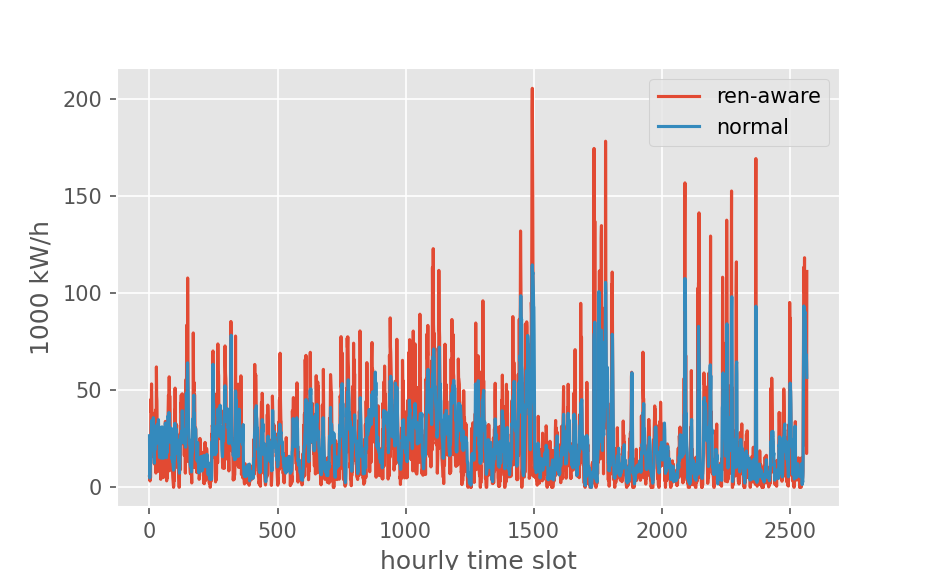

In [41]:
plt.close()
plt.plot(ren_wl, label='ren-aware')
plt.plot(nor_wl, label='normal')
plt.legend(loc='best')
plt.ylabel('1000 kW/h')
plt.xlabel('hourly time slot')
plt.show()

<IPython.core.display.Javascript object>


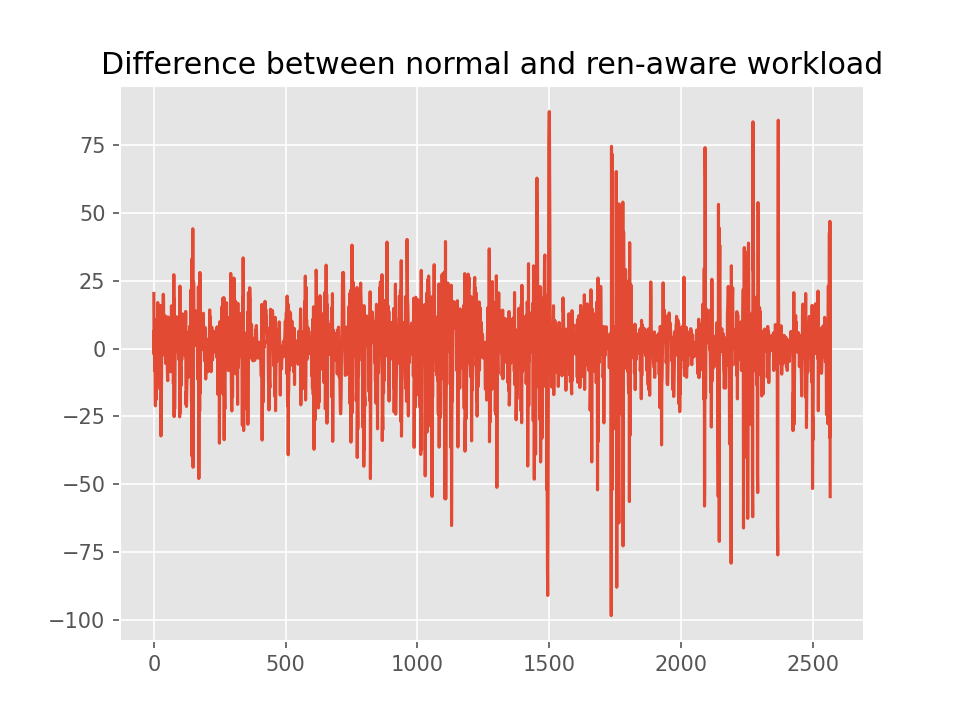

In [44]:
plt.close()
plt.plot(diff)
plt.title('Difference between normal and ren-aware workload')
plt.show()

In [45]:
diff2 = copy.deepcopy(diff)
# diff2.sort()
for i in range(5):
    print(diff2[i])

20.32528
-2.0804800000000006
6.77144
-8.101759999999999
9.067999999999998


In [46]:
d = np.array(diff2)
d.argsort()[-5:][::-1]

array([1501, 2370, 2274, 1500, 1499], dtype=int64)

In [47]:
print(diff2[1501],diff2[2370],diff2[2274])
print(ren_wl[1501],ren_wl[2370],ren_wl[2274])
print(nor_wl[1501],nor_wl[2370],nor_wl[2274])

87.33424 84.14784 83.55744000000001
5.51408 2.08888 14.59816
92.84832 86.23672 98.1556


In [48]:
d.argsort()[:5][::-1]

array([2191, 1494, 1757, 1495, 1736], dtype=int64)

In [49]:
print(diff2[2191],diff2[1494],diff2[1757])
print(ren_wl[2191],ren_wl[1494],ren_wl[1757])
print(nor_wl[2191],nor_wl[1494],nor_wl[1757])

-79.04136 -81.88368 -87.89712
129.4144 194.5472 111.46303999999999
50.37304 112.66352 23.56592


<IPython.core.display.Javascript object>


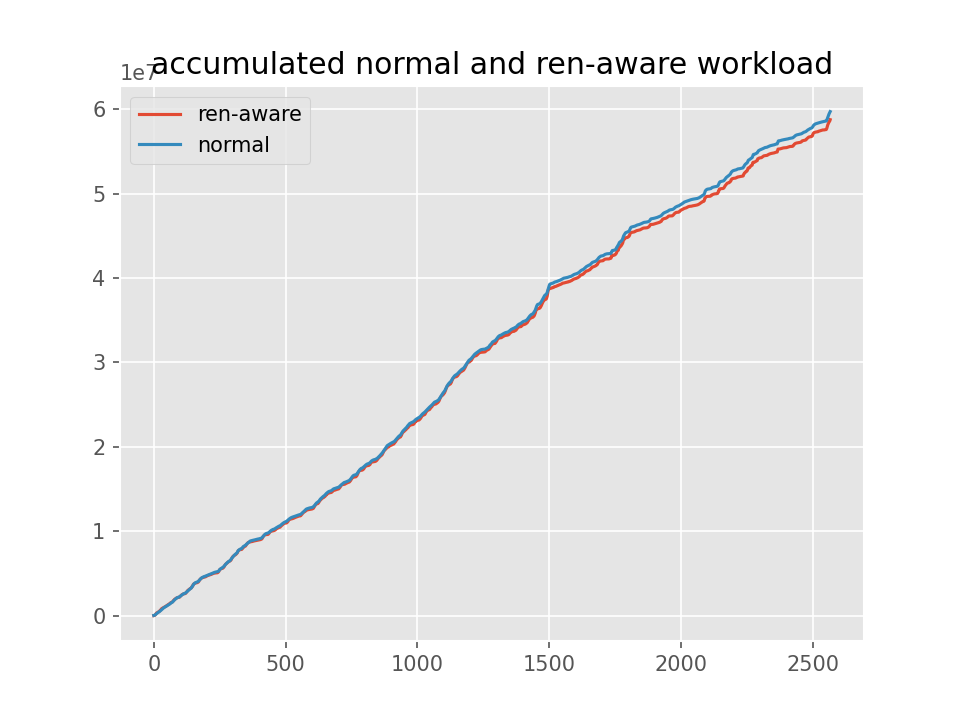

In [24]:
plt.close()
plt.plot(accu_ren_wl, label='ren-aware')
plt.plot(accu_nor_wl, label='normal')
plt.legend(loc='best')
plt.title('accumulated normal and ren-aware workload')
plt.show()

In [25]:
diff_accu = []
for i in range(len(accu_nor_wl)):
    diff_accu.append(accu_nor_wl[i] - accu_ren_wl[i])

<IPython.core.display.Javascript object>


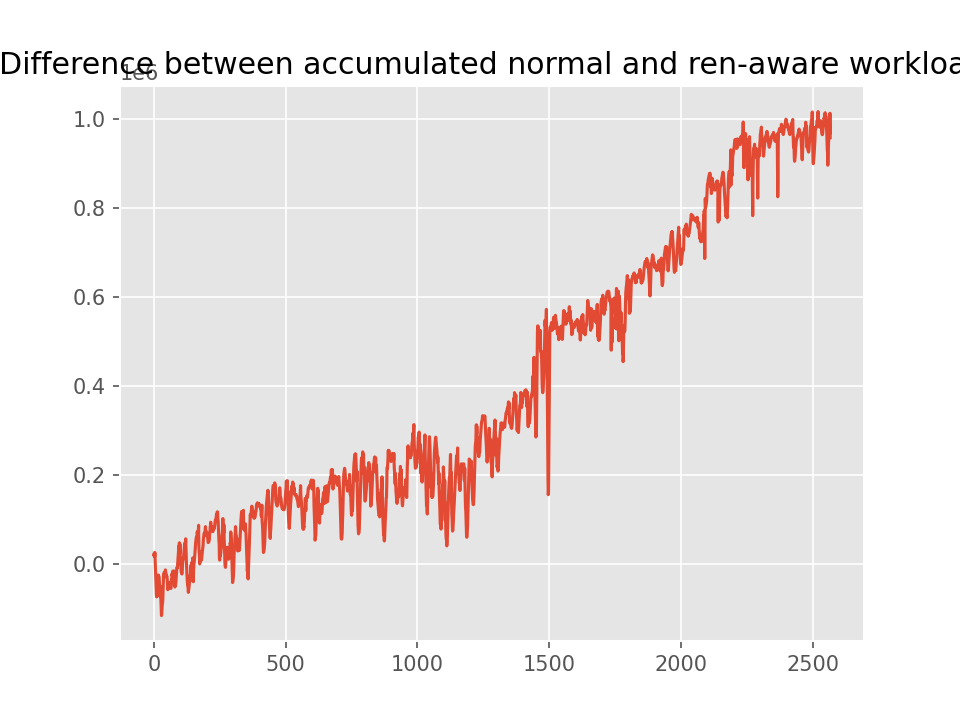

In [26]:
plt.close()
plt.plot(diff_accu)
plt.title('Difference between accumulated normal and ren-aware workload')
plt.show()

In [35]:
accu_ren_reduxCost = [x/1000000 for x in accu_ren_reduxCost]
accu_nor_reduxCost = [x/1000000 for x in accu_nor_reduxCost]

<IPython.core.display.Javascript object>


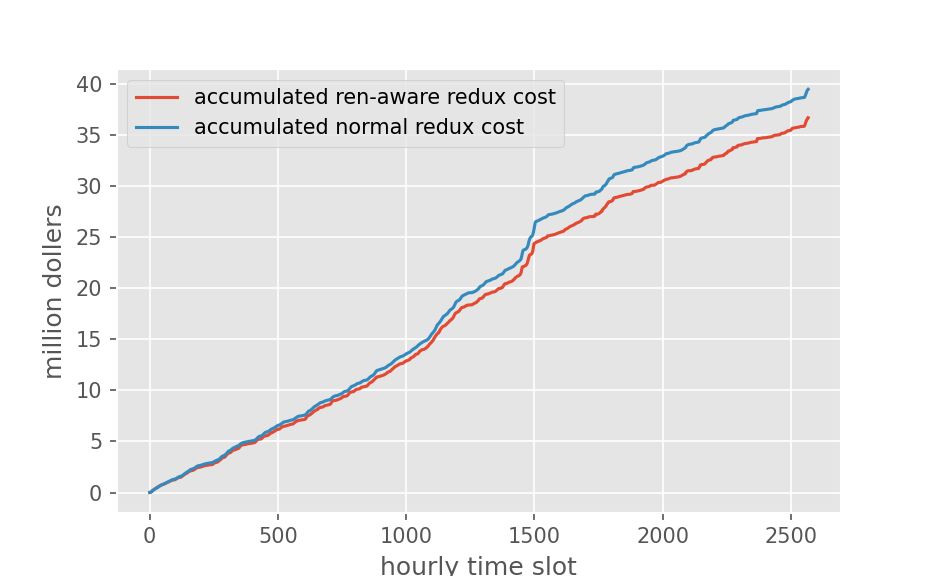

In [37]:
plt.close()
plt.plot(accu_ren_reduxCost, label='accumulated ren-aware redux cost')
plt.plot(accu_nor_reduxCost, label='accumulated normal redux cost')
plt.ylabel('million dollers')
plt.xlabel('hourly time slot')
plt.legend(loc='best')
plt.show()

In [51]:
accu_ren_reduxCost_list = []
accu_nor_reduxCost_list = []
for i in [1000, 2000, -1]:
    accu_ren_reduxCost_list.append(round(accu_ren_reduxCost[i],2))
    accu_nor_reduxCost_list.append(round(accu_nor_reduxCost[i],2))
print(accu_ren_reduxCost_list)
print(accu_nor_reduxCost_list)

[12.9, 30.52, 36.73]
[13.6, 32.96, 39.52]
